# Time Series Analysis


# Introduction to Time-Series Analysis

A time-series is a sequence of data points indexed in time order. Time-series analysis is used to understand and predict patterns in data using methods that extract meaningful statistics. Some common applications of time series analysis are forecasting, econometrics, signal processing, pattern recognition, etc...

**Time-series components**:

* **Trend**: shows a general direction of the time-series data over a long period of time. A trend can be *increasing, decreasing or stationary*.
<br><br>

* **Seasonality**: fluxuations that occur regularly based on a season or specific period, a repeating short-term cycle in the series data. For example, an increase of in fire place usage during winter and summer.
<br><br>

* **Cyclical component**: patterns that arise in extended time series, typically over the long-term (i.e. multiple years). These are trends with no set repetition over a particular period of time, unlike seasonality. An example would be the expansion and contraction phases in a business cycle that don't necessarily occur in regular intervals. 
<br><br>

* **Irregular variation or Noise**: random variation in the series. It is the component of the time series that cannot be attributed to the trend, seasonality or cyclic pattern. 
<br><br>

## 1. Basic Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

### Import data

In [2]:
df = pd.read_csv('data/AirPassengers.csv')
df.columns = ['Date', 'Amplitude']
df.head()

,Date,Amplitude
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Date'] = pd.to_datetime(df.Date)
df = df.set_index(df.Date)
df.drop('Date', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df.head()

Column datatypes= 
 Amplitude    int64
dtype: object


,Amplitude
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Visualizing the Time Series

A visual inspection of the time series can provide insight into trends, seasonality and other characteristics of the time series.

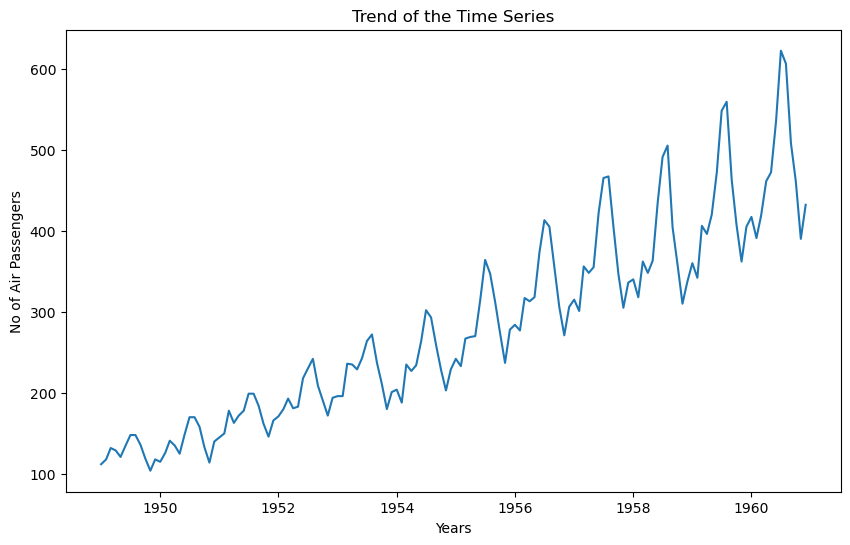

In [5]:
plt.figure(figsize= (10,6))
plt.plot(df)
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')
plt.show()

To emphasize the increasing trend, we can show a mirror plot of the series along the x axis.

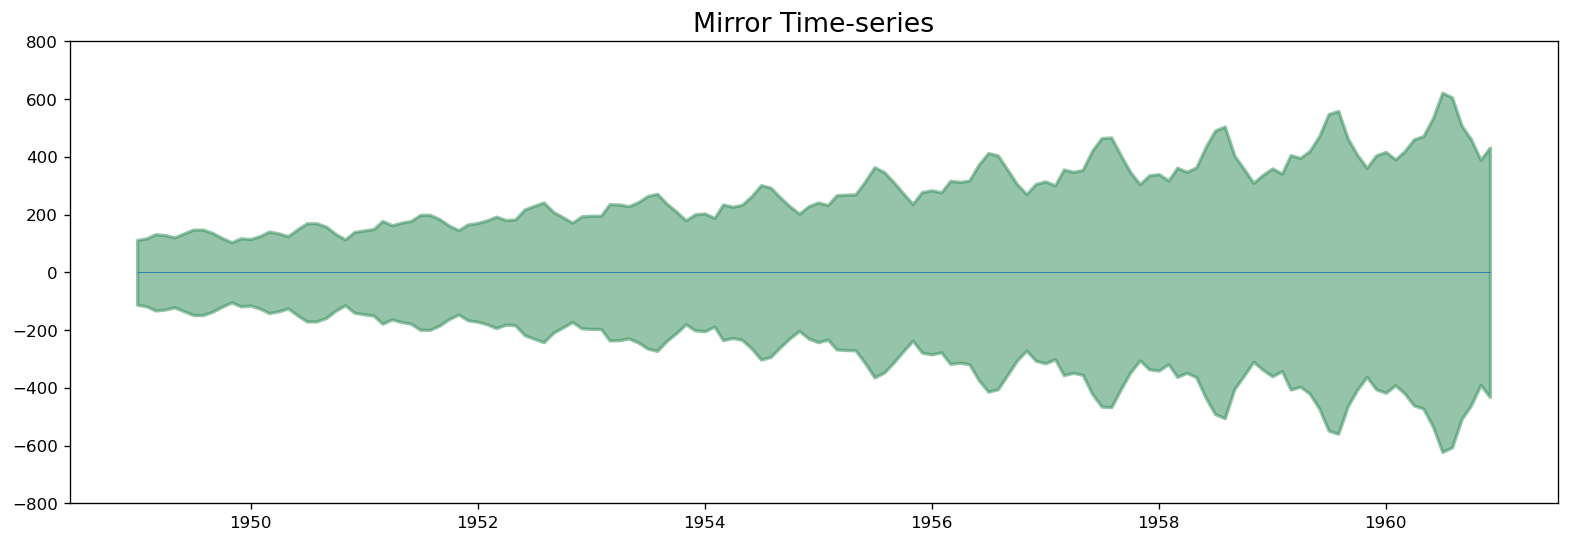

In [6]:
x = df.index
y1 = df['Amplitude'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Mirror Time-series', fontsize=16)
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()

Each data point corresponds to the monthly amount of passengers between 1949 and 1969. We can see it follows a repetitive pattern that has an increasing trend and a yearly seasonality. Due to the presence of both a trend and seasonality, the series is likely **non-stationary**. Non-stationary data can cause issues with many time series forecasting methods, which assume that the statistical properties of the series are constant over time.

To further emphasize the seasonal component of the time series, we can isolate it and visualize the yearly changes of the values.

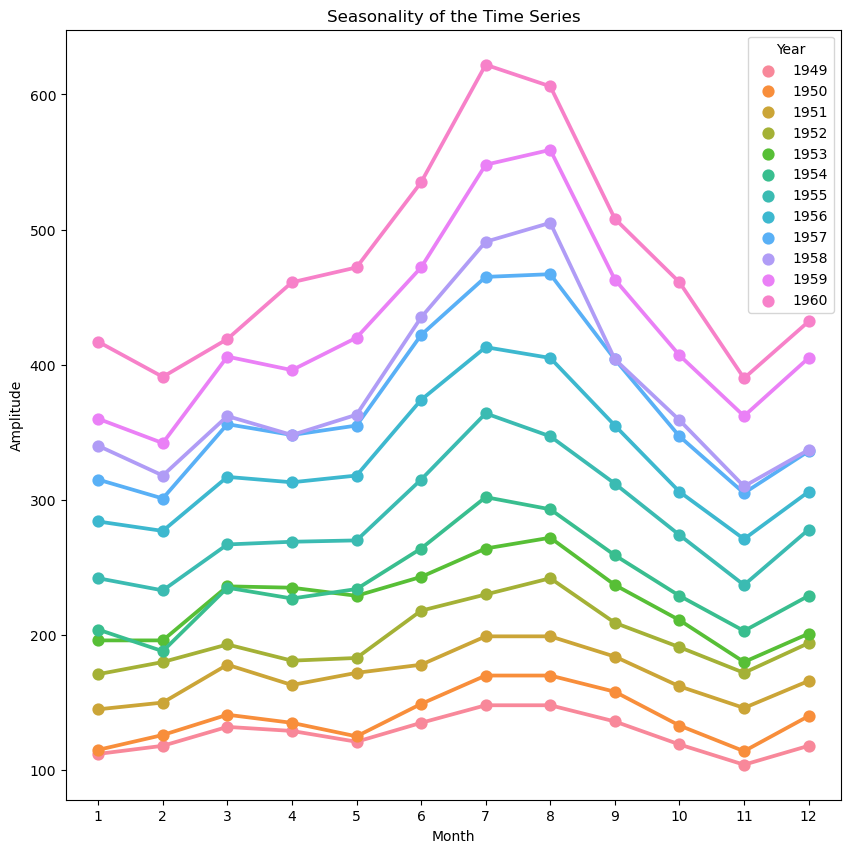

In [7]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month

# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Amplitude',hue='Year',data=df_temp)
plt.show()

Here we can clearly see the seasonal component of the time series, how there is a yearly upward trend at the begining, then a peak and then a downward trend. Also, the amplitude of this pattern increases each year.

## Stationarity

**Stationarity** is a property of a time series, that refers to whether or not its statistical properties, such as mean, variance and autocorrelation are constant over time. For a time series to be stationary, it should not exhibit trends or seasonality. There are several formas of stationarity:

1. **Strict Stationarity**: a strict stationary time series is one where the joint distribution of any moments of any degree is the same regardless of the time at which the series is observed. In other words, the series has identical statistical properties at each time point, and these properties are not dependent on the time at which the series is observed. <br><br>

2. **Weak Stationarity (Second-order or Covariance Stationarity)**: this is a more commonly used form of stationarity. A time series is said to be weakly stationary if the mean and variance are constant over time and the covariance between tow time periods depends only on the distance or lag between the two time periods and not the actual time at which the covariance is computed. This implies that the autocorrelation function will remain constant over time. Most statistical forecasting methods assume or require the time series to be weakly stationary. <br><br>

3. **Difference Stationarity**: a time series is difference stationary if it can be made sationary if it can be made stationary by differencing, which involves substracting the previous observation from the current observation. Differencing can help to eliminate or reduce trends and seasonality. <br><br>

**Non-stationary** time series are those that exhibit trends, varying variance, and cycles. These pose challenges for prediction because the behavior of the series can change over time, making it difficult to forecast future values based on past data. Many modeling techniques, like **ARIMA**, include differencing as a step to make a time series stationary.

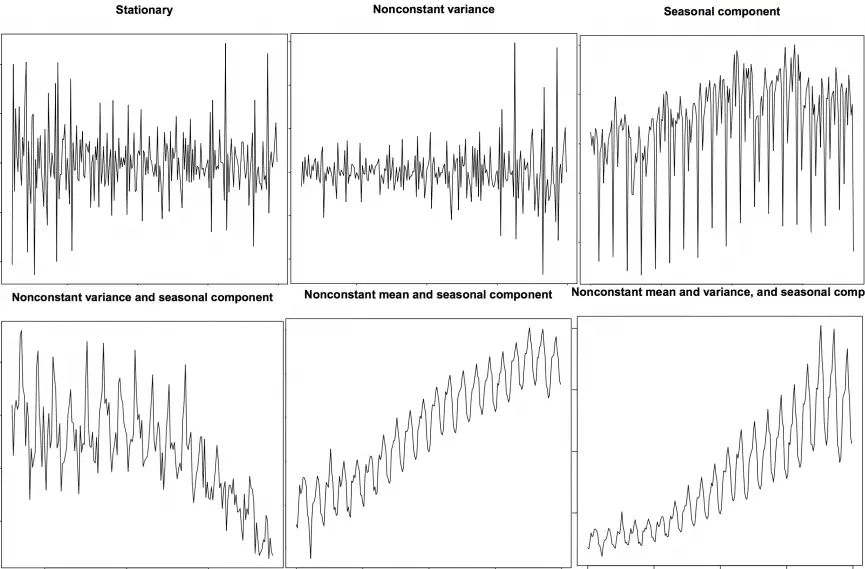



### Making a time series stationary

To make a time series stationary, we can apply come kind of transformation. These transformations may include: ***differencing, log, nth root*** or a combination of these. The most commonly used and convenient method to stationarize a series is by differencing the time series at least once.

#### Differencing

This method for making a time series stationary consists of substracting a value a time *t* by the value at time *t-1*. If the first difference doesn’t make a series stationary, we can go for the second differencing and so on. For example, consider the following series: [1, 5, 2, 12, 20]. First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]. Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]

## Stationarity Testing

Stationarity can be identified visually by plotting the time series and by decomposing its elements as we have seen above. In this case, our time series is clearly not stationary, as it has an evident trend and seasonality in it. More formally, there are several quantitative methods we can use to determine if a series is stationary. This statistical tests are called **Unit Root Tests**. The following are some examples and their implementation:

### Augmented Dickey-Fuller

**Augmented Dickey-Fuller (ADF)** test is a formal statistical method for assessing stationarity, and is a type of *unit root test*. A unit root test is characteristic of a time series that makes it non-stationary. Specifically, a time series has a unit root if a change in the series from one period to the next depends on the level of the series in the previous period. The **Null hypothesis (H0)** is that the series has a unit root.

If we consider the following autoregressive model of order 1:

$$\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \Delta \delta_1y_{t-1} + \dots + \delta_{p-1}\Delta y_{t-p+1} + \epsilon_t$$

Where:
* $y_t$ is the time series.

* $\Delta y_t$ is the first difference of the series.

* *t* is the trend.

* $\epsilon_t$ is white noise.

* *p* is the number of lags in the autoregression.

The **augmented** part in the ADF test comes from the inclusion of lagged difference terms $\delta_1\Delta y_{t-1}, \dots, \delta_{p-1}\Delta y_{t-p+1}$ which are added to the model to ensure that the error term $\epsilon_t$ is uncorrelated. 

The primary interest in the test is the $\gamma$ parameter. If $\gamma$ is significantly different from zero, then the null hypothesis of the unit root is rejected, indicating the series is stationary. Besides the **p-value**, the test also returns the **ADF statistic**. The more negative the value, the stronger the rejection of the hypothesis is. 


In [8]:
# Applying the ADF test
from statsmodels.tsa.stattools import adfuller
series = df['Amplitude']
result = adfuller(series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: 0.8153688792060423
p-value: 0.9918802434376409


The previous result is more evidence for the non-stationarity fo the time series we have, a high p-value and a non-negative ADF statistic are evidence for the null hypothesis.

### Kwiatkowski-Phillips-Schmidt-Shin

The **Kwiatkowski-Phillips-Schmidt-Shin (KPSS)** test is a statistical test that is used to determine whether a time series is stationary around a mean (***level stationarity***) or a deterministic trend (***trend stationarity***), as opposed to the ADF test which tests against a unit root. Unlike the ADF test, where the null hypothesis is that the series is that it has a Unit Root, the KPSS null hypothesis is that the time series is stationary.

The KPSS test is based on the following model for the observed time series $y_t$:

$$y_t = \mu + \tau_t + \eta_t + \epsilon_t$$


Where:

* $\mu$ is the intercept (constant term).

* $\tau_t$ is the deterministic trend (which can be excluded if testing for level stationarity). A deterministic trend is a consistent, predictable pattern in a time series data is due to known factors. This can take the form of a linear trend (where changes can occur at a constant rate over time) or a nonlinear trend (where changes can accelerate or decelerate over time). In the KPSS test, the deterministic trend is something we are trying to account for or remove to test the remaining components for stationarity. If we are testing for trend stationarity, the deterministic trend component is explicitly included in the model to isolate the stochastic trend. This part is modeled and removed if we are testing for trend stationarity.

* $\eta_t$ is the stochastic trend or random walk component. This is what the test is fundamentally looking for. The presence of a stochastic trend indicates a unit root, meaning the series in non-stationary. A stochastic trend implies that the path of the series follows random fluctuations. In other words, the future value of the series is a random step from the previous value, potentially with a drift. A series with stochastic trend is non-stationary because its properties (like mean and variance) change over time, and shocks to the series can have permanent effects. The KPSS assesses whether a stochastic trend is present in the time series. under the null hypothesis of the KPSS test, there is no stochastic trend, and any observed trend in the data is assumed to be deterministic.

* $\epsilon_t$ is the stationary error component that can be represented as the sum of previous error terms and a white noise error term. It is a series of uncorrelated random variables (white noise) with a constant mean, variance and no seasonality. The errors are assumed to be independent and identically distributed with a mean of zero. In the KPSS framework, the stationary error component represents the randomness of the series that cannot be explained by the deterministic trend or the stochastic trend. Is is what's left over after accounting for these trends. 

The KPSS statistic is calculated by estimating $\tau_t$ (if testing fo trend stationarity), detrending the series if necessary. If the test statistic is greater than the critical value, the null hypothesis of stationarity is rejected. By focusing on the stationary error component, the KPSS test aims to detect the presence of unit roots, suggesting that the time series is non-stationary. If the time series comprises only the deterministic trend and the stationary error (without a stochastic trend), then it is considered stationary around a mean or a deterministic trend, depending on the specification of the test.

In [9]:
# Code for the KPSS test
from statsmodels.tsa.stattools import kpss

# Apply the KPSS test
kpss_stat, p_value, lags, critical_values = kpss(series, regression='c', nlags='auto')

# regression='c' tests for level stationarity, use 'ct' for trend stationarity
# lags can be 'auto' which automatically determines the lag length or can be set manually

print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print(f'Critical Values: {critical_values}')

# Interpretation of results
if p_value < 0.05:
    print('Series is not stationary')
else:
    print('Series is stationary')


KPSS Statistic: 1.6513122354165206
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not stationary


C:\Users\Nicolás Balmaceda\AppData\Local\Temp\ipykernel_2424\340318640.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(series, regression='c', nlags='auto')


Here, again, we can see how KPSS test results are further evidence for the non-stationarity of the time series.

The critical values for the KPSS test are typically provided for different significance levels (e.g., 10%, 5%, 2.5%, 1%). These values are based on the KPSS asymptotic distribution under the null hypothesis of stationarity.

### Phillips-Perron Test

The **Philips-Perron test (PP)** is another test used to detect the presence of a unit root in a time series. It is similar to tha ADF test, but addresses a few of its shortcomings. Unlike the ADF test, the PP test is a **non-parametric** approach to time series testing to account for serial correlation and time-dependent heteroskedasticity. It allows fo fairly general forms of heteroskedasticity and autocorrelation in the error term.

The PP test examines a time series regression similar to that of the ADF test, in the following equation:

$$y_t = \alpha + \beta_t + \gamma y_{t-1} + \epsilon_t$$

Here, $y_t$ is the time series being tested, $\alpha$ is a constant, $\beta$ captures the *deterministic* time trend, and $\gamma$ measures the potential unit root. If $\gamma = 0$ then a unit root is present.

The PP test corrects the test statistics of the unit root test to account for a serieal correlation and heteroskedasticity in the error terms without adding lagged difference terms as in the ADF test. The null hypothesis for the PP test is that there is a unit root.

In [10]:
from arch.unitroot import PhillipsPerron


# Perform Phillips-Perron test
pp = PhillipsPerron(series)

print(f'PP test statistic: {pp.stat}')
print(f'p-value: {pp.pvalue}')
print('Critical Values:')
for key, value in pp.critical_values.items():
    print(f'\t{key}: {value}')

# Interpretation based on p-value
if pp.pvalue > 0.05:
    print('There is a unit root, the time series is non-stationary.')
else:
    print('No unit root, the time series is stationary.')


PP test statistic: -1.3511383338496654
p-value: 0.60546416457064
Critical Values:
	1%: -3.4769274060112707
	5%: -2.8819726324025625
	10%: -2.577665408088415
There is a unit root, the time series is non-stationary.


Here we use the arch library, because statsmodels does not include the PP test. This result, as both ADF and KPSS showed before, is evidence for a unit root in the time series (the time series is non-stationary).


## 4. Decomposition of a time series

The decomposition of a time series, as mentioned above, can follow an **Additive** or **Multiplicative Model**  depending on the nature of the time series. If the magnitude of the seasonal pattern, or the variation around a trend, appears to be roughly constant, an additive decomposition is more appropriate. If the magnitude of the seasonal pattern or the variation around the trend, appears to be proportional to the level of the time series, then a multiplicative decomposition is more suitable.

### Patterns in a Time Series

* An **Additive Model** will show the following component relationship:

$$Y_t = \text{Trend} + \text{Seasonality} + \text{Cyclic} + \text{Noise}$$

* A **Multiplicative Model** will show the following component relationship:

$$Y_t = \text{Trend} * \text{Seasonality} * \text{Cyclic} * \text{Noise}$$

In general, a time series may not have a *trend* or a *seasonality*. The current time series, as observed in the previous plot, has both.

### Decomposition steps:

1. **Choose a model**: choose whether an additive or multiplicative model is more appropriate given the nature of the time series.<br><br>


2. **Estimate the trend**: a common method is the **moving average**. For example, for a yearly pattern, a 12 month moving average can help ascertain the trend component. Another technique could involve **polynomial regression** or **Locally Estimated Scatterplot Smoothing (LOESS)**. For a **moving average** we must follow the steps bellow:

    * **Define a Window Size**: decide on the number of periods (n) you want to include in the moving average. 
    
    * **Compute the Average**: for each time point *t*, we calculate the average of the surronding *n* points. The manner in which we average depends on whether we use a *simple or centered moving average*
    
        * **Simple Moving Average (SMA)**: for each time point *t*, the average is taken on the *n* preceding data points including the current point:
        
        $$SMA(t) = \frac{Y_{t-(n-1)} + \dots + Y_{t-1} + Y_t}{n}$$
        
        
        * **Centered Moving Average (CMA)**: the average is taken such that the current time point *t* is in the center (when *n* is odd, when *n* is even there's a slight variation where we can take the average of 2 centered sequences), and is expressed:
        
        $$CMA(t) = \frac{Y_{t-(n-1)}/2 + \dots + Y_{t-1}/2 + Y_t/2}{n}$$
        
        
        * **Plot the averages**: once we've calculated the moving averages for each time point, we can plot them alongsid the original time series to visualize the estimated trend.
        
        
        * **Limitations**: it gives equal weight to all points in a window, which may not be ideal for time-series where recent observations are more indicative of the trend. It doesn't reach up to the starting and ending points of the time series because of the window size. This means we can't compute a moving average for the first and last few observations, depending on the window size. It might not capture more complex trends or non-linearities.<br><br>
        

3. **Deseasonalize the series**: for *additive* series, substract the trend component from the original series. For a *multiplicative* series, we divide the original series by the trend.<br><br>


4. **Estimate the Seasonal Component**: for each season, calculate the average of the detrended values for that season.<br><br>


5. **Estimate the Residual Component**: for an *additive* series we substract the estimated trend and the seasonal components from the original series. For the *multiplicative* series we divide the original series by the estimated trend and seasonal components.<br><br>

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

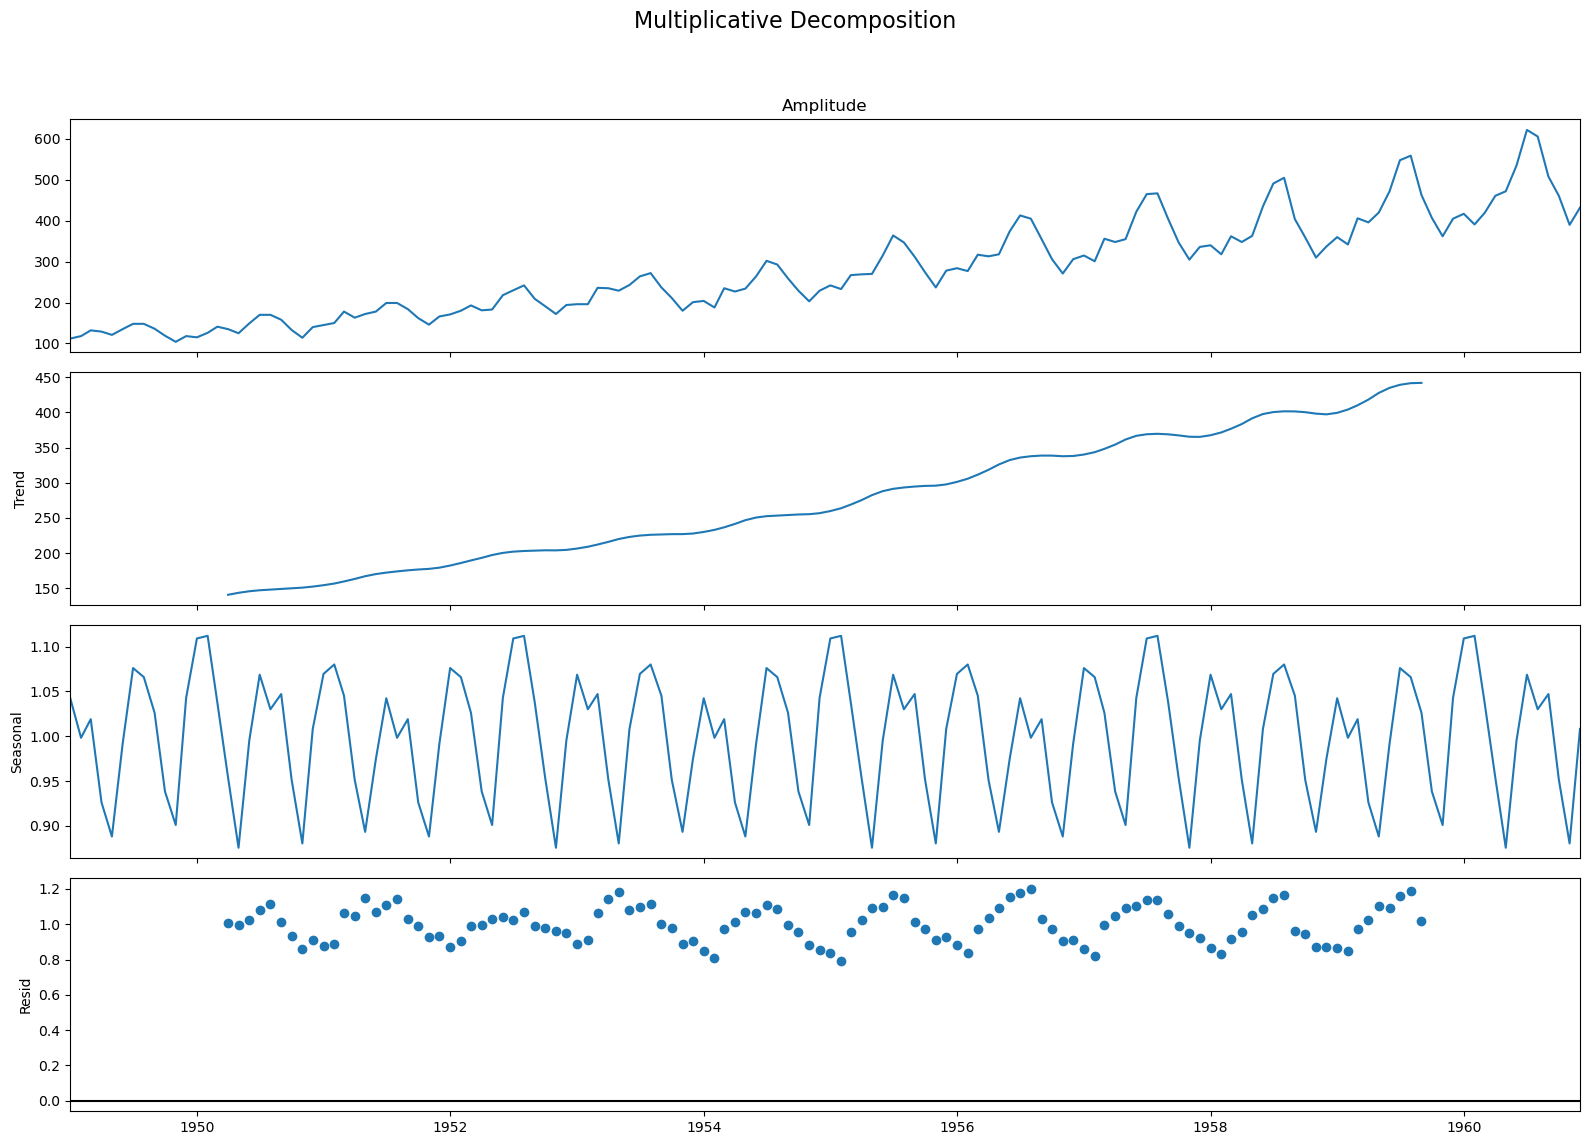

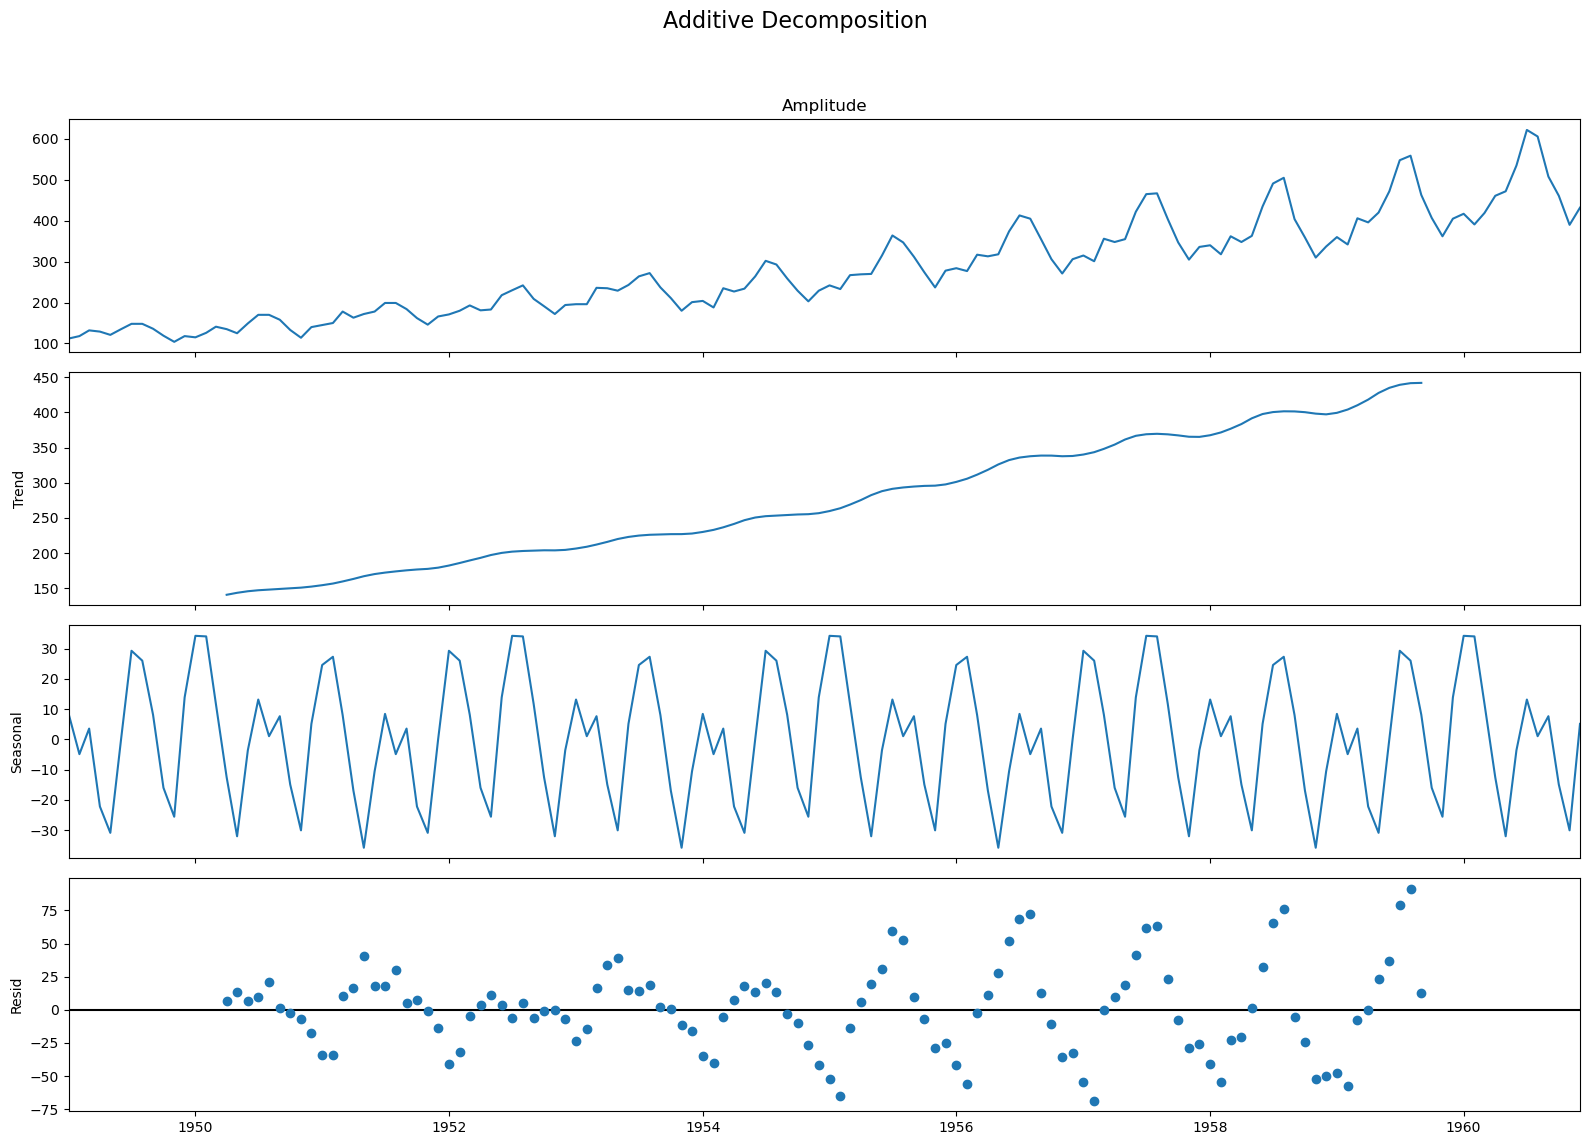

In [12]:
# Multiplicative decomposition
multi_decom = seasonal_decompose(df['Amplitude'], 
                                 model = 'multiplicative', 
                                 period=30)

# Additive decomposition
additive_decom = seasonal_decompose(df['Amplitude'], 
                                    model = 'additive', 
                                    period = 30)
# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multi_decom.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decom.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In both plots we can see how the trend of the time series is positive. Also, the seasonality is evident for each cycle. The residuals will be further examined later.

When choosing between an additive or multiplicative decomposition we often start by visualizing as done above, but for a more systematic approach we can follow these steps:

a. **Visual Inspection**: This approach is important, but subjective, and is not a recommended method for model evaluation by itself.

* If the amplitude of the seasonal fluctuations or the variation around the trend seems to be roughly constant over time, then an additive model might be more appropriate.


* If the amplitude of seasonal fluctuations or the variation around the trend seems to be increasing or decreasing as thetime series values increase or decrease, then a multiplicative model might be more suitable.<br><br>


b. **Variance Stabilizing Transformation**: Applying a transformation, such as a logarithm or a square root, can stabilze the variance. If applying this transformation makes the pattern look additive, then a multiplicative decomposition can be applied to the transformed series. <br><br>

c. **Residual Analysis**: We can perform both an additive and multiplicative, as done above, and examine the residuals. The idea here is to choose the decomposition method that gives residuals that look closest to *white noise*. We can:

* Examine the aucorrelation plot (ACF) of the residuals. White noise residuals would have no significant autocorrelation (i.e. no significant spikes in the autocorrelation plot as we will see later).

* We can conduct statistical tests for white noise, like the **Ljung-Box test**.<br><br>
    
Although the above plots give guidance on which model is best, best practice motivates us to apply systematic methods such as Variance Stabilization, ACF and statistical tests. 

First we will apply **Variance Stabilization** using a logarithmic transformation on the series data and visualizing the transformed series.

In [13]:
# create a transformed column of the amplitude data
df['log_amplitude'] = np.log(df.Amplitude)
df.head()

,Amplitude,log_amplitude
Date,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


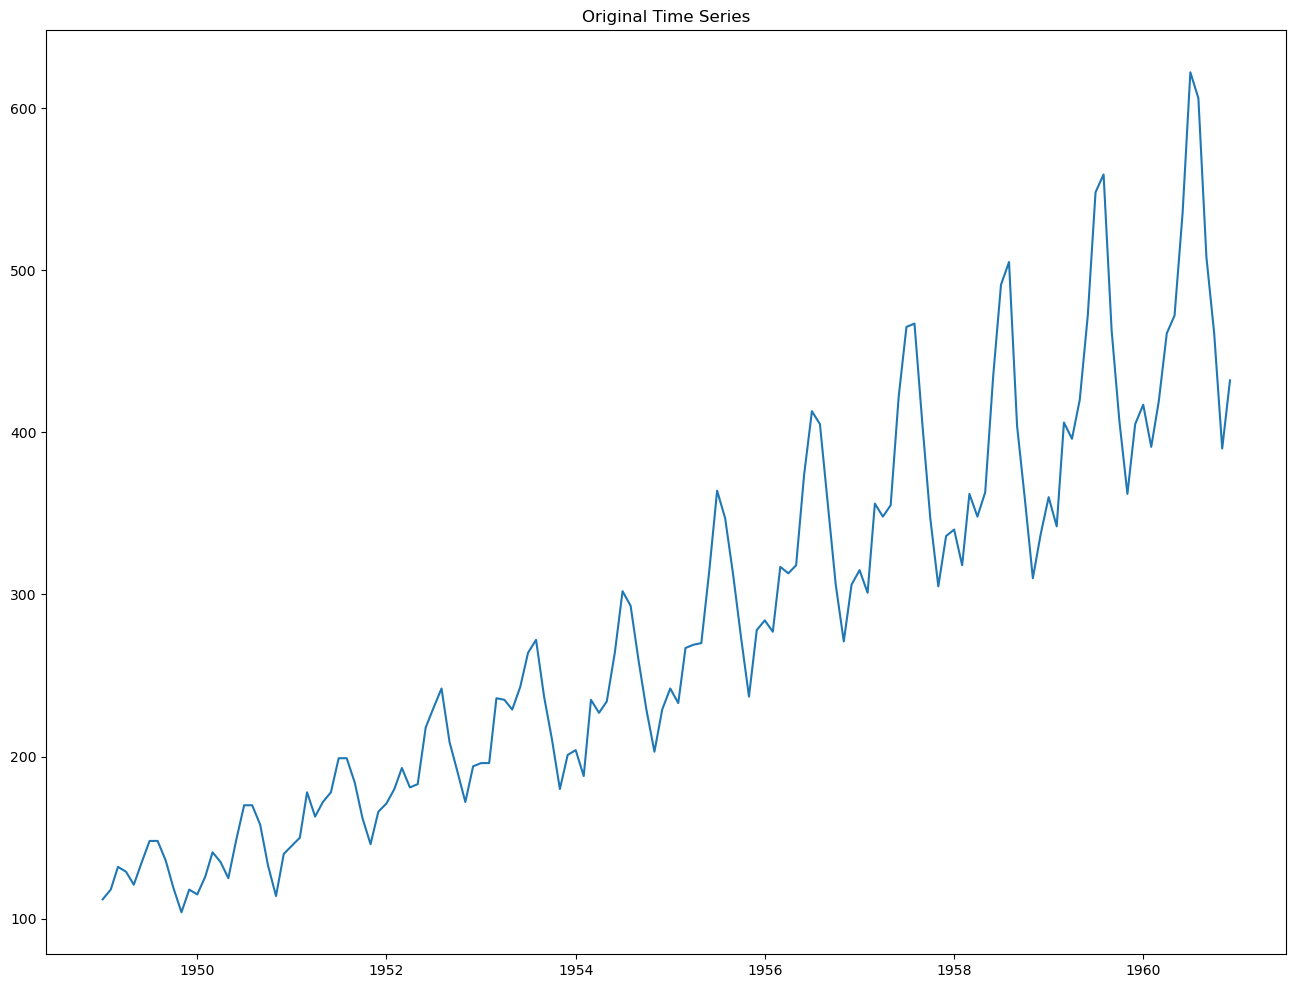

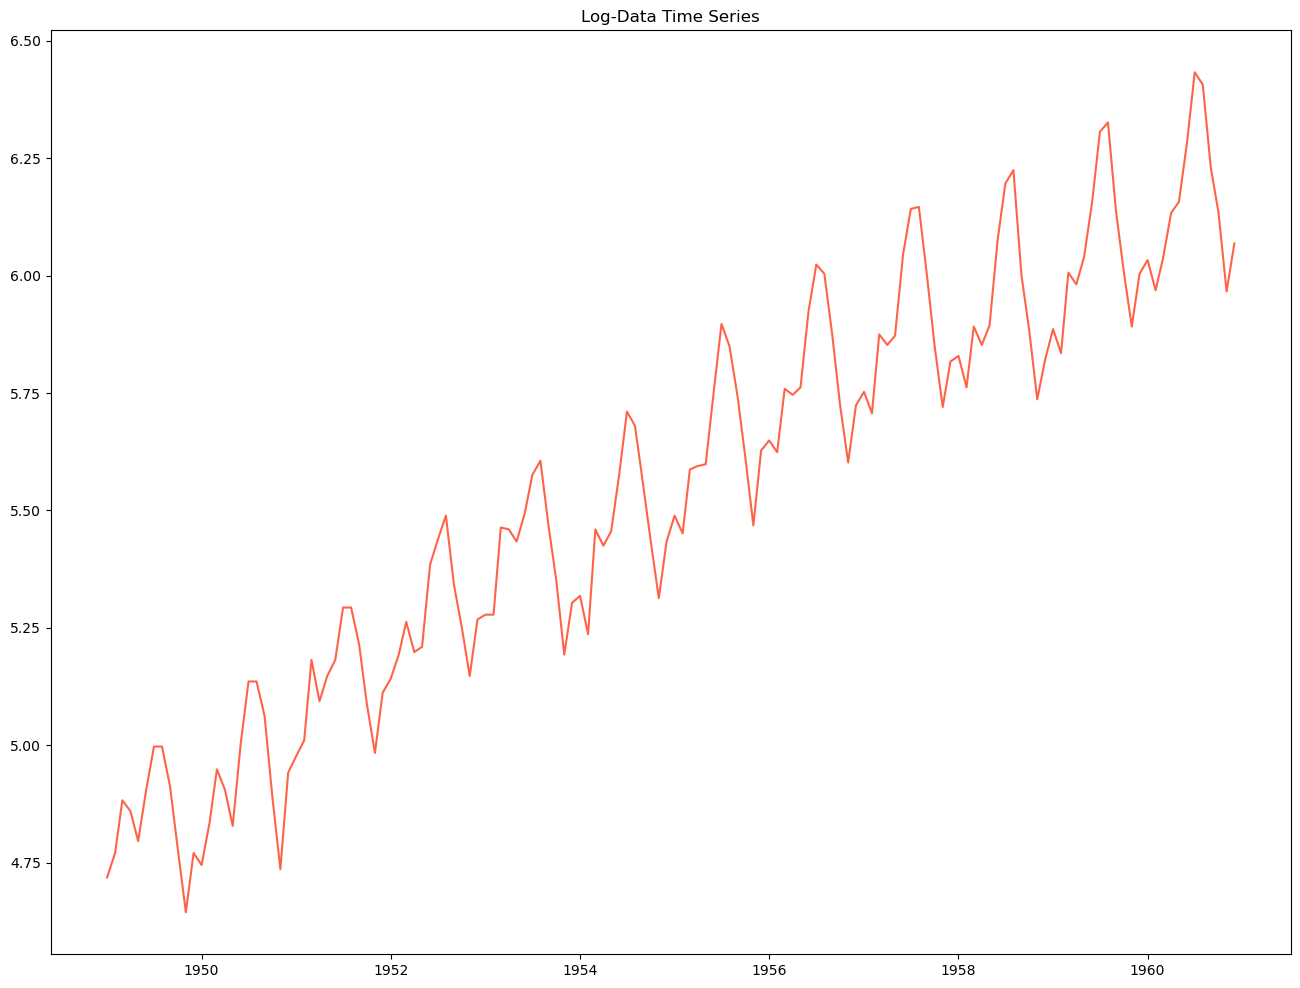

In [22]:
plt.plot(df.Amplitude)
plt.title('Original Time Series')
plt.show()
plt.plot(df.log_amplitude, color= 'tomato')
plt.title('Log-Data Time Series')
plt.show()

In the above figure we can see how the increase in the amplitude of each *season* observed in the original series has been made constant. This, as mentioned before, is evidence for the adequacy of the multiplicative model in describing the components of this time series.  



#### LOESS

**LOcally Estimated Scatterplot Smoothing** is a method that allows us to perform local regression, allowing us to fit complex surfaces to datasets. It is used in **Seasonal-Tend decomposition using LOESS (STL)**. When applied to time series analysis, it can help in capturing non-linear trends or seasonality patterns that might not be well captured by linear or polynomial methods. The following are some fundamentals of LOESS:

* **Local Regression**: LOESS fits simple models to localized subsets of the data to create a smooth curve through a dataset. The model that is fitted is typically linea or quadratic.


* **Weight Function**: the core idea of LOESS is to give the datapoints near ($x_i, y_i$) higher wieghts than those far away when estimating the curve at $x_i$. The weight of the data point reduces the further away from the target point they are. A common weight function used is the *tricube weight function*:

$$w(x) = \Big{(}1 - |\frac{x-x_i}{h}|^3\Big{)}^3$$

    Here, x is the point for which the estimate is being made, $x_i$ are the points in the neighborhood, and *h* is the bandwidth or window width.


* **Smoothing parameter**: this determines the width of the window of data points considered for local regression. It's often denoted by $\alpha$ and usually ranges between 0 and 1. A smaller parameter will result in a smoother curve.


* **Degree of Polynomial**: LOESS can be used with various degrees of polynomials. The most common are:
    * *Linear*: fitting straight lines to the local subsets of data.
    
    * *Quadratic*: fitting parabolas to the local subsets of data. This can capture more complex patterns but can also be more sensitive to outliers.<br><br><br>
    

* **Fitting the Model**: Within each localized window, a simple model is fitted to the data points using weighted least squares, giving more weight to points closer to the target point. 
    
    
In time series analysis, STL decomposition, LOESS is applied separately to the trend and seasonal components.

* **Trend Component**: LOESS is first applied to the entire time series to estimate the trend component. This is done by choosing a bandwidth that captures the long-term movement of the series without being overly influenced by short term fluctuations.


* **Seasonal Component**: After detrending the series (substracting the estimated trend), LOESS is then used to estimate the seasonal component. This typically involves a shorter bandwidth focused on capturing regular patterns that repeat at known intervals (monthly or yearly like in this case).


* **Iterative Refinement**: STL involves iterating these steps, each time updating the trend and seasonal estimates. This iterative approach allows the algorithm to adaptively refine these components, accommodating more complex pattern and interactions between trend and seasonality.


* **Residual Component**: the residual component that remains after both the trend and seasonal components have been substracted represents the part of the series that cannot be explained by these smoothed components.


A critical decision in LOESS is choosing the **bandwidth** for smoothing. Too wide a bandwidth may *oversmooth* the data and miss important details, while too narrow a bandwidth may lead to overfitting and capturing noise as part of the trend or seasonal components. Also, LOESS can be computationally intensive, especially for large datasets, as it involves fitting models to many localized subsets of the data. 



In [16]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.filters.hp_filter import hpfilter


In [17]:
# Fit the time series data to the LOESS
stl = STL(df['Amplitude'], period=12)  # Here, period=12 for monthly data.
loess_fit = stl.fit()

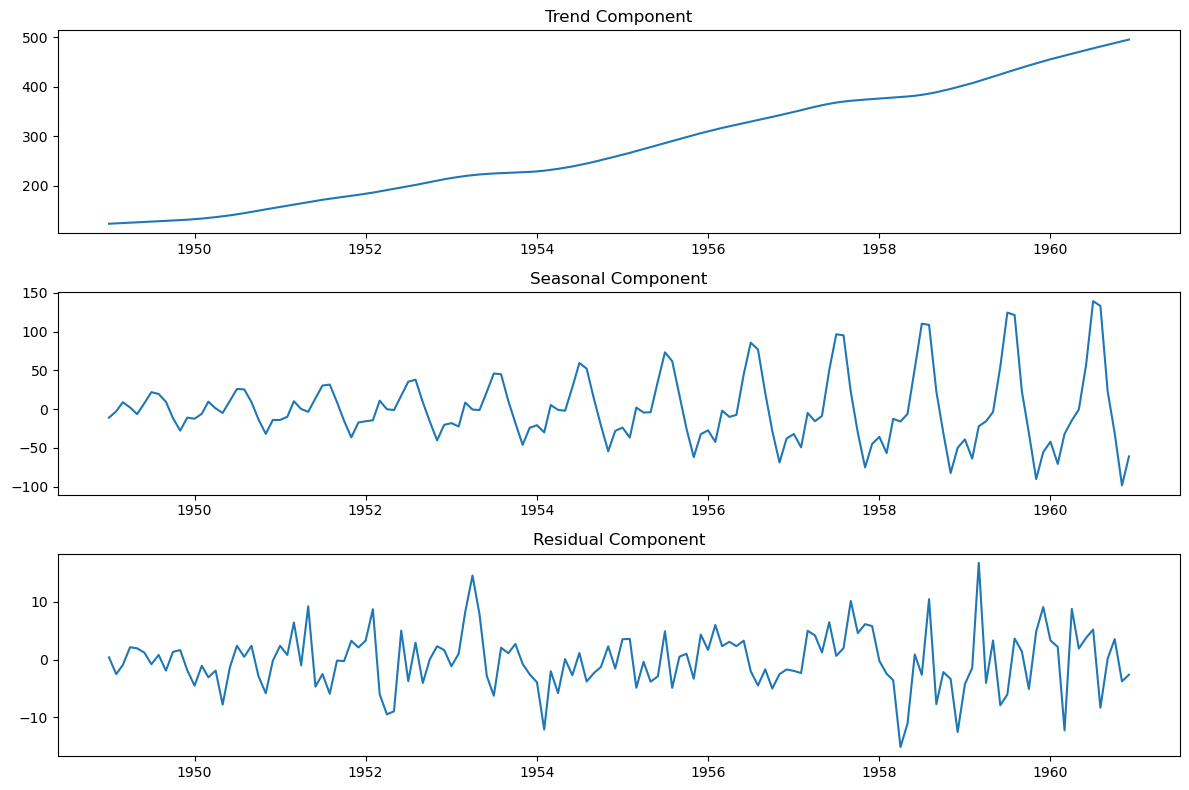

In [18]:
# Plot different components
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(loess_fit.trend)
plt.title('Trend Component')

plt.subplot(3,1,2)
plt.plot(loess_fit.seasonal)
plt.title('Seasonal Component')

plt.subplot(3,1,3)
plt.plot(loess_fit.resid)
plt.title('Residual Component')

plt.tight_layout()
plt.show()


After applying STL to the amplitude time-series we can clearly see the difference between the decomposition using this method and the components plotted with multiplicative and additive methods. Particularly, the *residuals* with STL clearly show a *white noise* like plot. To further confirm this random distribution of the residuals we can use autocorrelation again, but now on the residuals generated with STL.




## 5. Making the Time Series Stationary

As we have seen above, stationarity is necessary for using many statistical tools for analysis and forecasting in time series. 

Stationarity is an essential preprocessing step to meet the assumptions of statistical tests and models, to improve the interpretability of the data, and to enhance the accuracy of forecasts and other analyses. Many time series models and statistical tests assume the data is stationary, so detrending can help stabilize the mean of the series across time.

The trend is a component, among others, like the seasonality and the noise, as discussed above, that can be a part of a time series. Detrending the series allows us to isolate and examine non-trend components more closely. For example, once a trend is removed, it may be easier for us to model the seasonal behavior or detect cycles and irregular patterns in the series. Moreover, when forecasting with models that assume stationarity, detrending can improve the accuracy of forecasts. After the forecast is produced, the trend can be added back to the predictions to translate them back to the original scale.



In [35]:
# Function for plotting and testing for stationarity
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

### Linear model

There are different methods for detrending a time series. One method, as shown next, uses the signal.detrend method that removes the trend of a series by fitting a linear model (*line of best fit*) to the data and then substracting this model from the original series. 

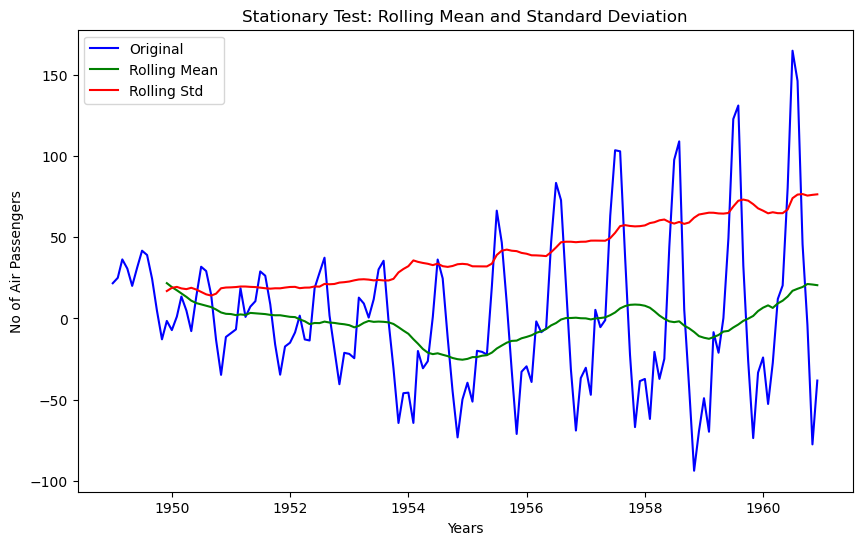

Results of Dickey-Fuller Test
Test Statistic                  -2.101966
p-value                          0.243725
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [37]:
from scipy import signal

df['linear'] = signal.detrend(df['Amplitude'].values)

stationarity_test(df['linear'])

# plot the detrended series
#plt.plot(detrended)
#plt.title("Detrended Amplitude Time Series")
#plt.show()

As we can see in the figure above, most of the trend component has been removed from the series. But, there is still a significant difference in variance over time shown by the **Rolling Std**. Moreover, the ADF test shows a p-value of 0.24, indicating that the series is still non-stationary. 

### Mean substracting

For a series with a constant long-term average, another approach can be to simply substract the mean value from the series.

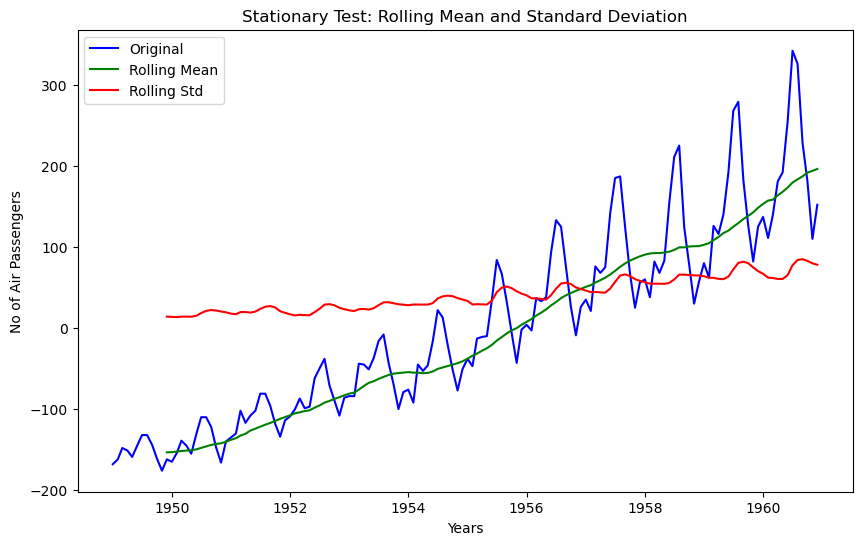

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
KPSS Statistic: 0.09614984853532726
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is stationary


C:\Users\Nicolás Balmaceda\AppData\Local\Temp\ipykernel_2424\2999806419.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(detrended, regression='c', nlags='auto')


In [39]:
df["sub_mean"] = df['Amplitude'] - df['Amplitude'].mean()

stationarity_test(df.sub_mean)

# Apply the KPSS test
kpss_stat, p_value, lags, critical_values = kpss(detrended, regression='c', nlags='auto')

# regression='c' tests for level stationarity, use 'ct' for trend stationarity
# lags can be 'auto' which automatically determines the lag length or can be set manually

print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print(f'Critical Values: {critical_values}')

# Interpretation of results
if p_value < 0.05:
    print('Series is not stationary')
else:
    print('Series is stationary')

The figure clearly shows how this approach does not handle the trend or seasonality, and the statistics confirm this. But, it does remove a lot of the variance change over time. This can be seen in a, for the most part, stable rolling standard deviation. Later we will come back to this approach and its applications.



### Differencing

Another common approach is to difference the series. This is a particularly useful method when the trend is not linear but is rather a function of the time series' own past values.

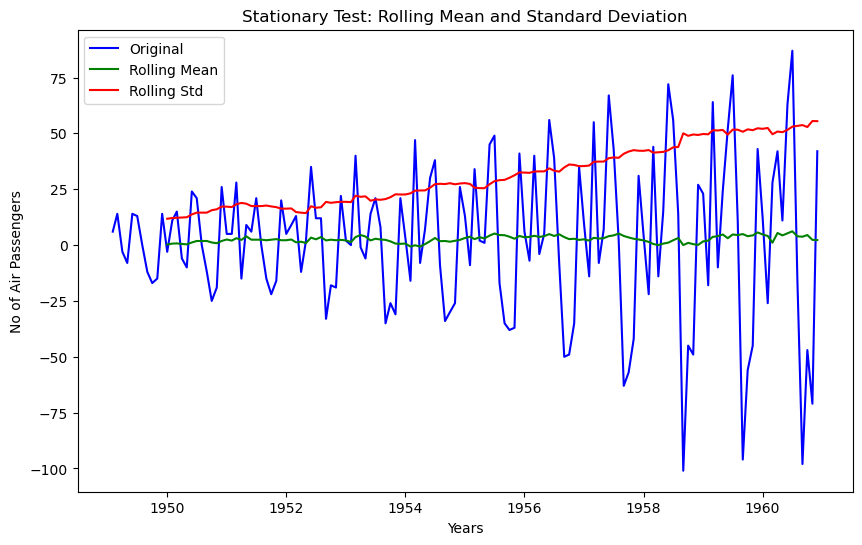

Results of Dickey-Fuller Test
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [41]:
df['diff_amp'] = df.Amplitude.diff(periods = 1)
stationarity_test(df.diff_amp.dropna())

The above code has differenced the time series in the form $Y(t) = Y_t - Y_{t-1}$. In the plot can observe how this process has eliminated the trend component of the series, but, at least visually, the upward variance is still be present. Also, the p-value of the ADF test is still non-significant, although it has been reduced extensively. 

The **variance** here is also affecting above results. This can be removed using a transformation technique as described above.

### Transformation

As mentioned above, the variability of the differenced time series increases as the value of the series increases. This is characteristic of multiplicative processes.

A **log-transformation** is a powerful tool in stabilizing the variance across different levels of the series. It converts a multiplicative relationship into an additive one, which often results in a series with a more constant variance. The log-transform is helpful in **stabilizing variance** and can help in **linearizing relationships**, both helpfull strategies before applying an ARIMA model.

The following code log-transformes the original data and visualizes both, and then differences the log-transformed data.

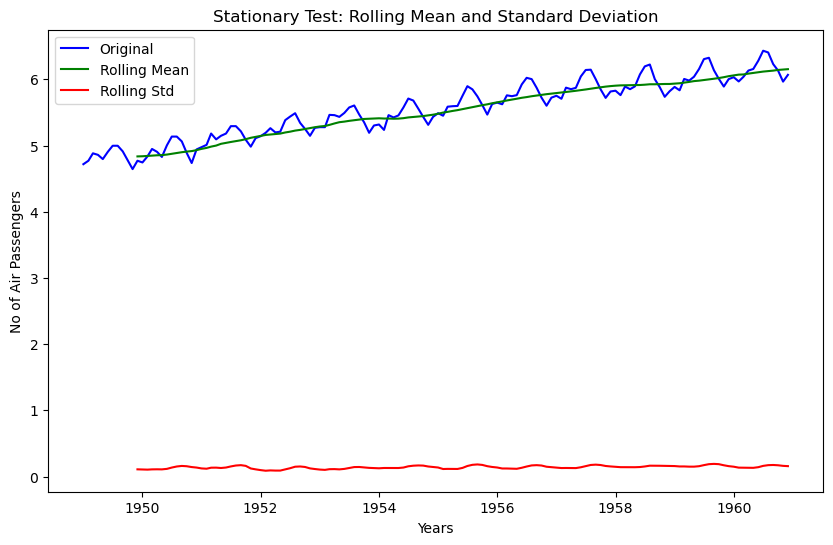

Results of Dickey-Fuller Test
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [44]:
stationarity_test(df.log_amplitude)

In the above plot we can see how the log transformation handles variance stabilization, as the rolling standard deviation is mostly constant over time. Next we handle the trend by applying a difference on the log data.

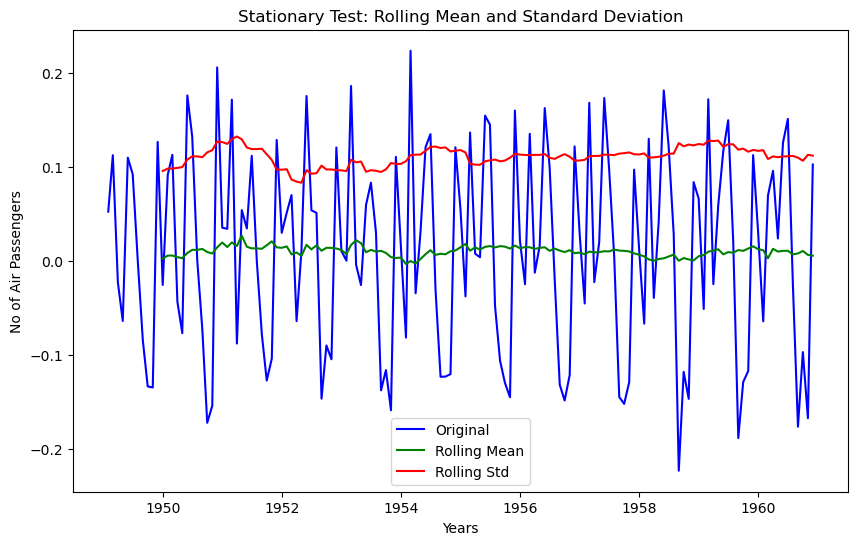

Results of Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [45]:
df['log_diff_amp'] = df.log_amplitude.diff(periods = 1)

stationarity_test(df.log_diff_amp.dropna())

Although visually this seems to have handled most of the variance change and the trend, the ADF test is still non-significant, indicating some non-stationarity is still present. 

Here we can further remove the remaining components by 

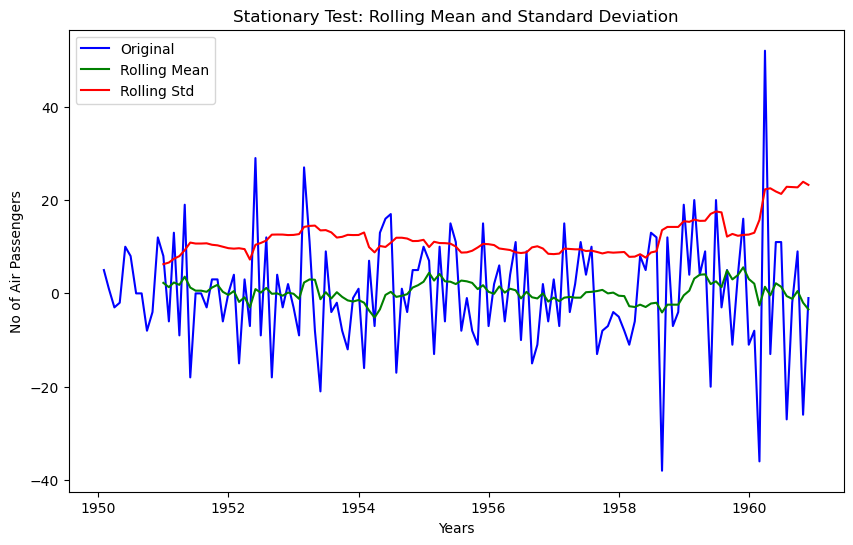

Results of Dickey-Fuller Test
Test Statistic                -1.559562e+01
p-value                        1.856512e-28
#Lags Used                     0.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


In [50]:
# Assuming monthly data, so we use a lag of 12 to remove seasonality
df['deseasonalized'] = df["Amplitude"] - df['Amplitude'].shift(12)

# Taking a first difference to remove any remaining trend
df['detrended'] = df['deseasonalized'].diff()

stationarity_test(df.detrended.dropna())

Here we can see that the trend and the seasonality have been lost. Both visually and statistically, there is no non-stationarity in the series, as indicated by the ADF test.

Now that we have reviewed the relevance of stationarity and time series components, we can take our first steps into developing a model using the time series data.

## 6. Autocorrelation and Partial Autocorrelation

**Autocorrelation** and **Partial Autocorrelation** play a key role in understanding the properties of time series data and in the development of models like **ARIMA** (AutoRegressive Integrated Moving Average).

### Autocorrelation (ACF)

Autocorrelation, also known as *serial correlation* or *lagged correlation*, measures the linear relationship between lagged values of a time series. A **Lag** is the distance in time between two points in a time series. Autocorrelation measures how the series correlates with itself at different lags. For instance, autocorrelation at lag 1 measures the correlation between values that are one time period apart.

The autocorrelation function (ACF) at lag *k* is defined as:

$$\rho_k = \frac{Cov(Y_t, Y_{t-k})}{Var(Y_t)}$$

Where:

* $\rho_k$ is the autocorrelation at lag *k*.

* $Cov(Y_t, Y_{t-k})$ is the covariance between the time series values at time *t* and *t-k*.

* $Var(Y_t)$ is the variance of the time series.

#### Autocorrelation Plot

The following image is an **autocorrelation plot**, also known as *correlogram*, which displays the correlation of a time series with its own lagged values. Each point on the plot indicates the **autocorrelation coefficient** for a specific lag (-1 to 1). A positive value suggests a positive change in the past will lead to a positive change in the future (and viceversa for negative change), or, in other words, a direct relationship between lags. A *negative value* implies an inverse relationship between past and future changes. 

In the context of **ARIMA** modeling, the autocorrelation plot helps in identifying the order of the **Moving Average (MA)** component. For example, if the autocorrelations are significant for the first few lags and then quickly taper off, it might suggest an MA process of that order. Also, the pattern of autocorrelation can give us clues about the atationarity of the series. In a stationary time series, autocorrelations typically drop to zero relatively quickly, whereas in a non-stationary series, they can remain significant even at high lags. For seasonality, repeating patterns in the plot can indicate that it is presente in the data.



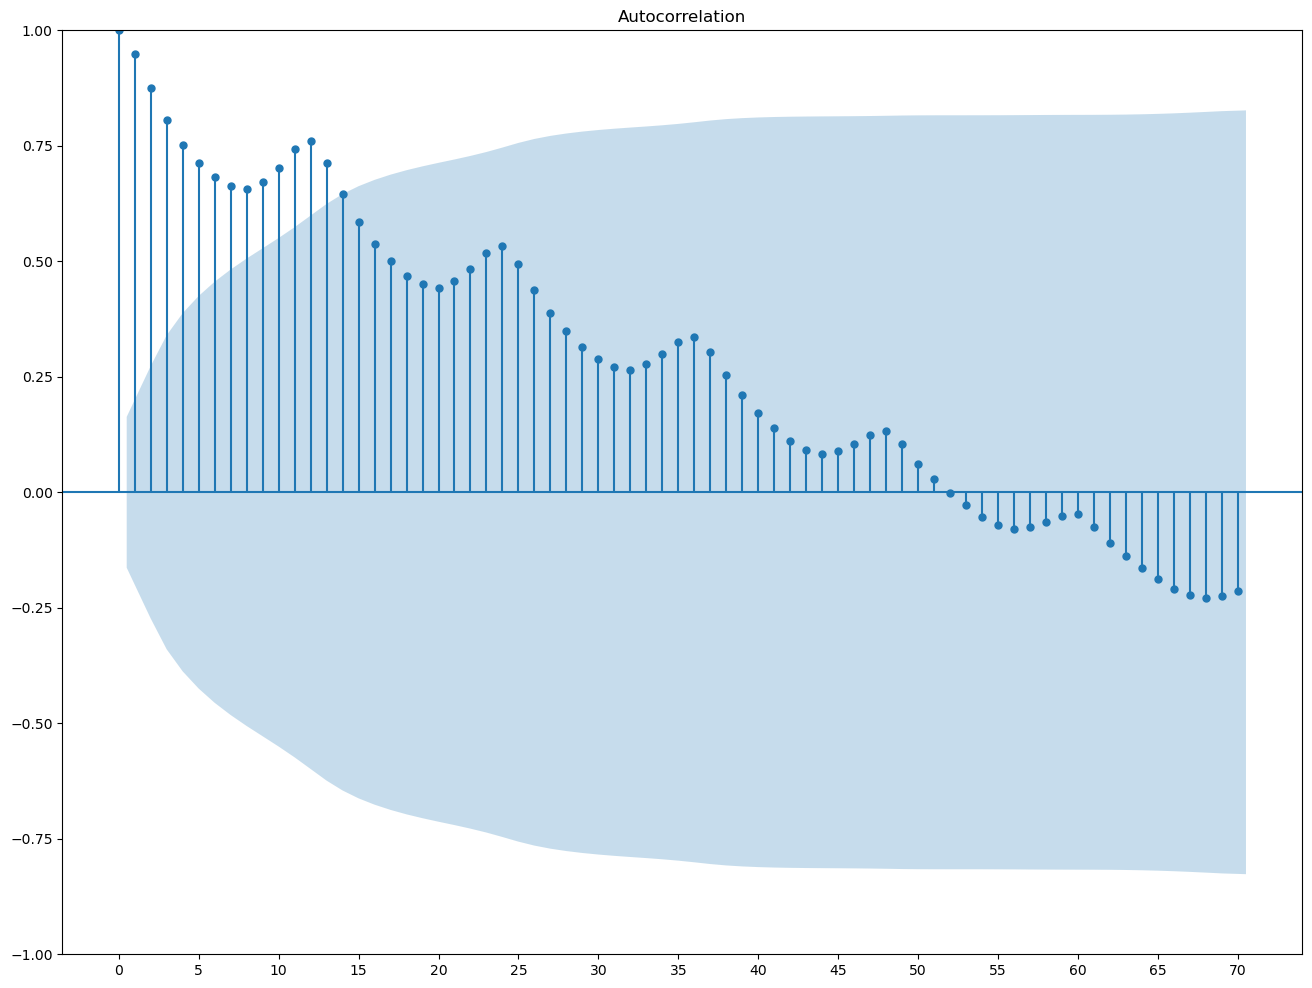

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.ticker import MultipleLocator

series = df.Amplitude

fig, ax = plt.subplots()
plot_acf(series, lags=70, ax=ax)
ax.xaxis.set_major_locator(MultipleLocator(5))
plt.show()

The autocorrelation plot above shows an initial decline, starting at 1 (as expected for a lag of 0: a point correlated to itself). Then, there's a steady decline in autocorrelation values as the lags increase. This is indicative of a positive correlation that decreases as time lags grow. This further confirms the trend present and the need for stationarity. Some seasonality is evidenced here, seen in the valley-peaks along the plot every in multiples of 12, but can be better assessed with the PACF.

### Partial Autocorrelation (PACF)

**Partial Autocorrelation** measures the correlation between two points in a time series, controlling for the presence of all the other correlations at shorter lags. Unlike ACF, which includes indirect correlations, PACF isolates the direct effect of past data points on the current point. PACF is crucial in identifying the order of the AutoRegressive (AR) part of the ARIMA model. 

The PACF at lag *k* can be computed using regression analysis. It is the coefficient of the last lag when the time series is regressed on its past lags up to lag *k*. For lag *k*, the PACF is formulated as follows:

$$\phi_{kk} = Corr(Y_t - P_{t,k-1}, Y_{t-k} - P{t-k,k-1})$$

Where:
* $\phi_{kk}$ is the partial autocorrelation at lag k.

* $P_{t,k-1}$ is the projection (predicted value) of Yt based on al the values up to *k-1* lags.

* $P_{t-k,k-1}$ is the projection of $Y_{t-k}$ based on all the values up to *k-1* lags.



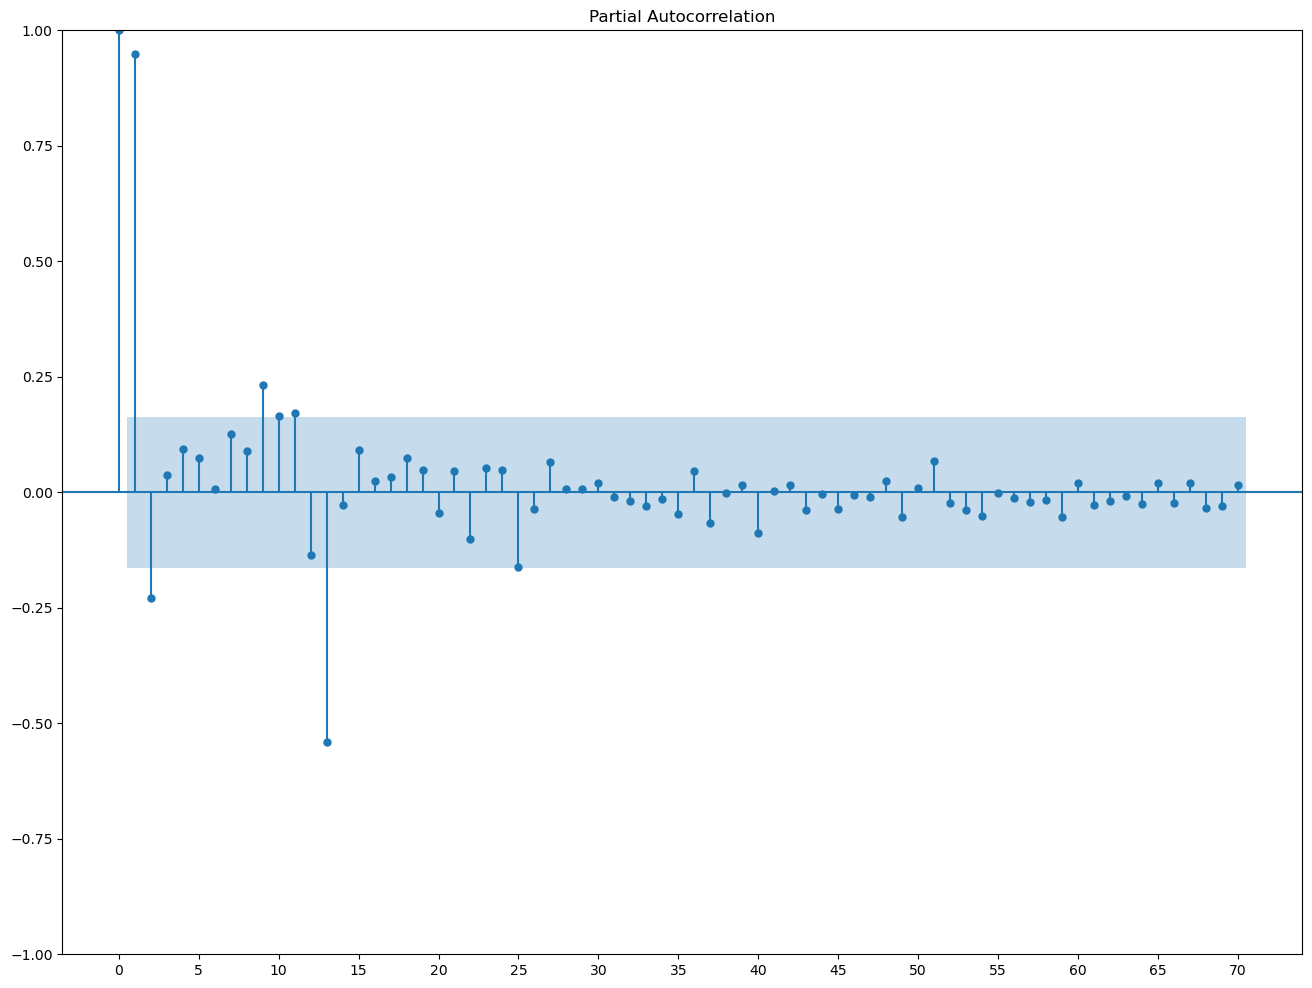

In [27]:

fig, ax = plt.subplots()
plot_pacf(series, lags=70, ax=ax)
ax.xaxis.set_major_locator(MultipleLocator(5))
plt.show()

The above PACF plot is used to identify the order of the autoregressive (AR) terms in an ARIMA model. Here, the values outside the shaded area (which represents the confidence interval) show a significant partial autocorrelation. After lag 1 there is only one other significant value around lag 12. The significant spike at lag 1 indicates that the series has a strong correlation with its immediate past value even after controlling for the correlations at all intervening lags. Also, the negative peak at around 12 suggests a seasonality of 12. Since we know the data, we can confirm this seasonality, as the lags represent the months and there is a yearly seasonality. We should see these peaks at multiples of 12 (i.e. 12, 24, 36,...) but the lack of this pattern can be explained by the trend that we have already confirmed in previous analysis.

Given this PACF plot, we could initially try fitting an ARIMA model. The trend and seasonality of the time series, evidenced by the previous analysis and the peak at lag 12, are indicative of non-stationarity. As we have mentioned before, many models, as is the case for **ARIMA**, require stationarity. 

The next analysis we can do is apply ACF and PACF plots to the differenced series generated, and anlyze the cutoffs and the corresponding AR(p) and MA(q) components for the ARIMA model. Also, we could include a **SARIMA** component in the modeling. Next we will see these concepts and their application in depth.

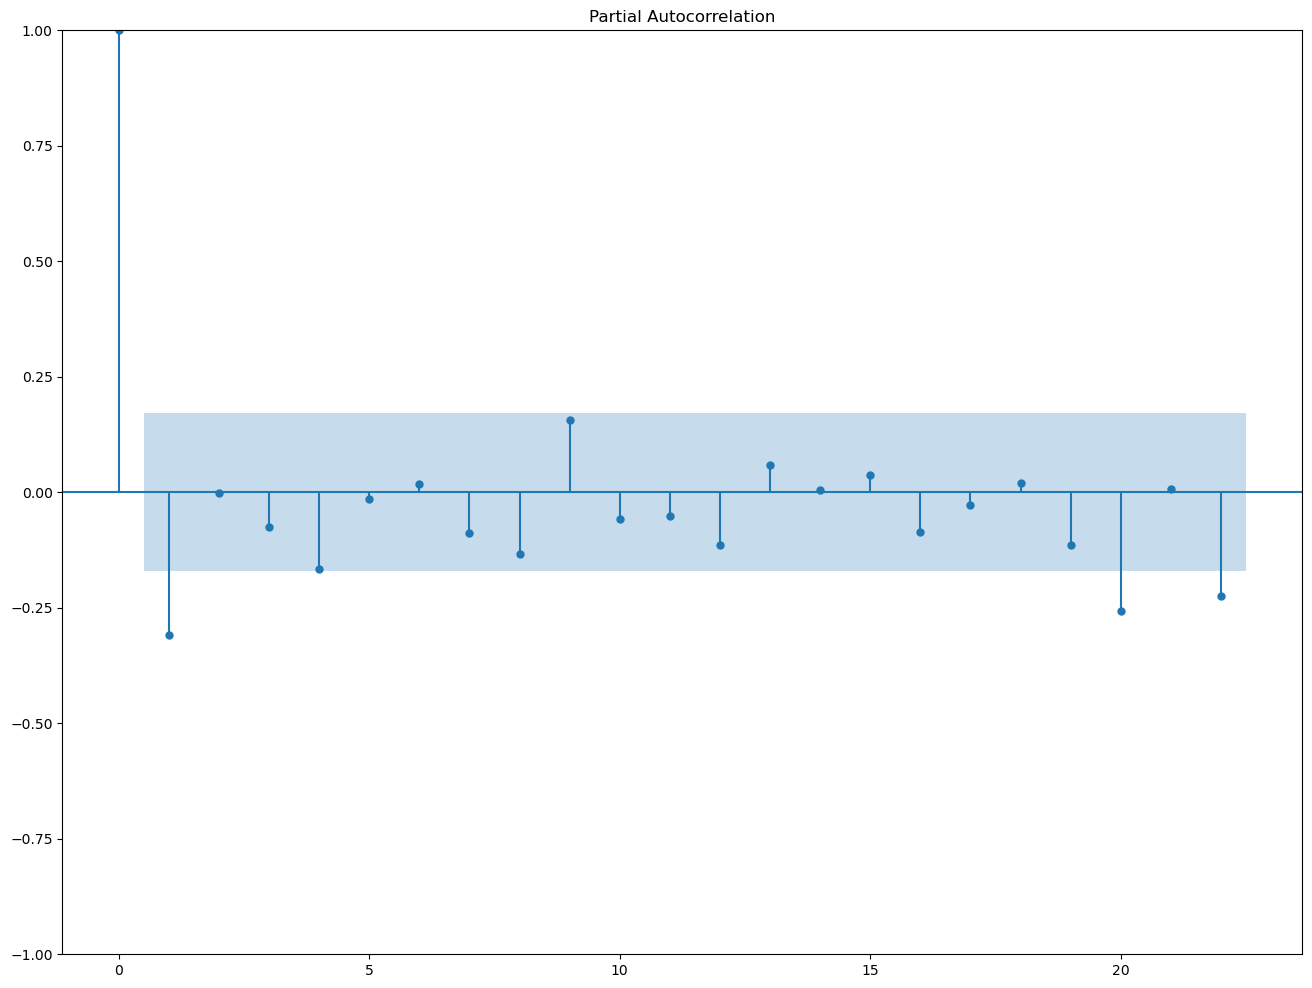

In [28]:
plot_pacf(df.detrended.dropna())
plt.show()

Here the PACF of the differenced time series data provides some insight. There is a significant negativa partial autocorrelation at lag 1. This suggests that the value of the series at one time point is negatively correlated with its value at the next time point, after controlling for all other autocorrelations. Beyond lag 1, the PACF values are within the confidence interval. The PACF above indicates that an AR(1) term may be apropriate for the ARIMA model. 

Given the ACF and PACF plots, a possible ARIMA model for this data could be ARIMA(1,1,0). Here, 1 represents th AR of 1, due to the significant spike on lag 1. The next 1 represents the differencing order of 1, which was used to make the series stationary. 0 suggests no MA component is needed, as indicated by the lack of significant spikes in the ACF beyond lag 1.

Next we will try to fit an ARIMA model using the parameters identified.

## 7. Fit a Model

### Auto-Regressive Integrated Moving Average (ARIMA)

#### Auto-Regression

An **AR(k) process** refers to an **AutoRegressive** model of order *k*, the AR component of ARIMA. This process models the current value of the series as a linear combination of its previoues *k* values. The term *auto* signifies that it's regression of the variable against itself.

The formulation od an AR(p) process is as follows:

$$Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \epsilon_t$$

Where:

* c is a constant.

* $\phi_k$ are the parameters of the model.

* $\epsilon_t$ is the white noise or error term at time t.

* p is the order of the autoregressive process, indicating how many past values of the series we're using to predict the current value.

For example, an *AR(1)* model would predict the current value based on its immediate previous value ($Y_{t-1}$), and an *AR(2)* model would predict the current value based on its two previous values. For an AR(k) process, the PACF plot typically shows significant partial autocorrelations up to lag *p* and then drops sharply, while the ACF plot tends to taper off more gradually.

#### Integrated

**Integrated** refers to the differencing of observations to make the time series ***stationary***: constant mean, variance and autocorrelation. A ***non-stationary*** series may have trends or seasonality which need to be removed, often by *differencing*, before AR and MA compnents can be effectively estimated. If *d* is the order of differencing, then it means we substract the previous observation from the current observation *k* times. For instance, if *d = 1* then $\hat{Y}_t = Y_t - Y_{t-1}$ 


#### Moving Average

Above, when we refer to an **MA(k) process** we are referring to a specific type of time series model known as the **Moving Average** model of order *k*. In time series analysis "Moving Average" is the "MA" component in the context of **ARIMA (AutoRegressive Integrated Moving Average)**. 

An MA(q) process can be formally described by the following equation:

$$Y_t = \mu + \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \dots + \theta_q\epsilon_{t-q}$$

Where:
* $Y_t$ is the time series value at time t.
* $\mu$ is a constant, representing the mean of the series.
* $\epsilon_t$ is the white noise or error term at time t.
* $\theta_k$ are the parameters of the model.
* q is the order of the moving average process, indicating the number of lagged error terms that are included in the model

For example, an *MA(1)* model would consider the error term from one time point ago ($\epsilon_{t-1}$). An *MA(2)* model would consider the error terms from one and two time points ago ($\epsilon_{t-1}$ and $\epsilon_{t-2}$), and so on. In the context of **ACF** and **PACF**, for an *MA(k)* process the ACF plot typically shows significant autocorrelations up to lag *k* and then drops sharply, while the PACF plot tends to taper off more gradually.

**ARIMA** is applied through the following steps:

1. **Stationarity**: ensure that the series is stationary. If the series is not stationary, we use differencing (the *Integration* component). The order *d* is the number of differences required to achieve stationarity.<br><br>

2. **Determine *p* and *q***: *p and q* can be determined using the ACF and PACF plots. PACF can be used to determine *p*: lag value where the PACF cuts off for the first time. ACF can be used to determine *q*: lag value where the ACF cuts of for the first time.<br><br>

3. **Model Estimation**: use statistical methods to estimate the parameters of the ARIMA model. 

### Model Performance

Steps 1 and 2 have been performed above, so next we will apply our first approach to an ARIMA model:

In [29]:
from statsmodels.tsa.arima.model import ARIMA

series = df['Amplitude']
model = ARIMA(series, order=(1,1,0))
model_fit = model.fit()

# summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Amplitude   No. Observations:                  144
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -698.926
Date:                Tue, 28 Nov 2023   AIC                           1401.852
Time:                        09:39:56   BIC                           1407.778
Sample:                    01-01-1949   HQIC                          1404.260
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3066      0.080      3.849      0.000       0.150       0.463
sigma2      1029.2429    103.738      9.922      0.000     825.920    1232.566
Ljung-Box (L1) (Q):                   0.66   Jarque-

C:\Users\Nicolás Balmaceda\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nicolás Balmaceda\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nicolás Balmaceda\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


The above summary of the model results shows several metrics of that give us information on different aspects of model quality. **Log Likelihood** measures how well the model fits the data, where higher values (closer to zero) indicate a better fit. **Akaike Information Criterion (AIC)**, **Bayesian Information Criterion (BIC)** and **Hannan-Quinn Information Criterion (HQIC)** are other measures of model quality, where lower values represent better model quality. They should be interpreted in comparison to another model.

The **Ljung-Box Test** checks for autocorrelation of the residuals of the model. A p-value of 0.42 suggests that there is little evidence for autocorrelation, which is what we are looking for, we want the residuals to be random. But, the **Heteroskedasticity Test**, which checks for constant variance, has a p-value close to 0 which can be a concern given the model assumptions. 

Overall, the model seems significant. However, the potential heteroskedasticity may affect the forecast intervals and model assumptions may not hold. It might be worthwhile to investigate this further, potentially using models that allow for changing variance over time like **GARCH**, or transform the data to stabilize the variance before modeling.

The following images are a diagnostic plots for the ARIMA model, which are used to assess the adequacy of the model fit.

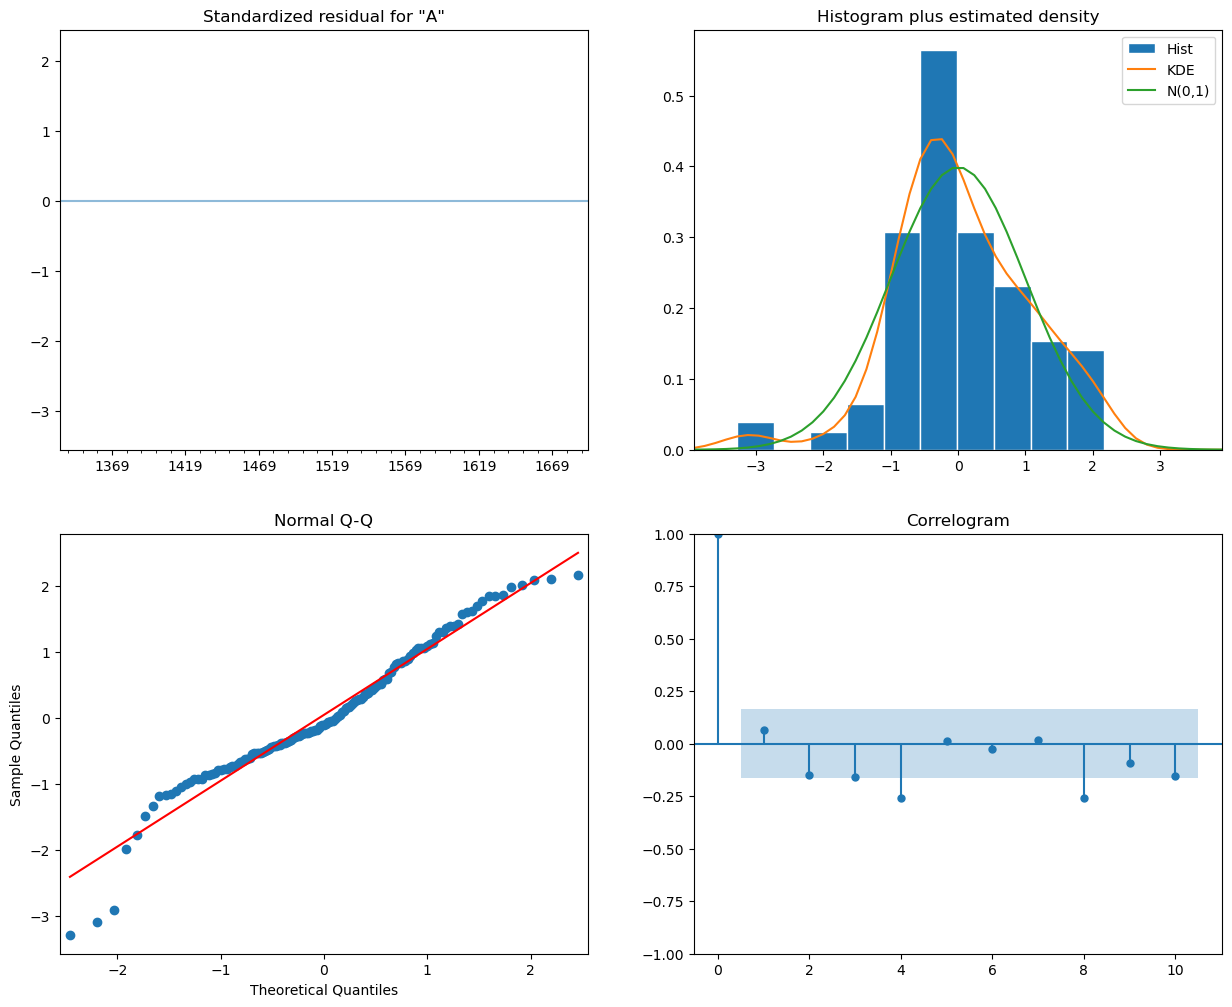

In [30]:

# Plot the diagnostics
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

The **Standardized Residuals Plot** (above left) shows the difference between observed values and the values predicted by the model, divided by the standard deviation of the residuals. Ideally, we want to see residuals fluctuating randomly around zero without any discernible pattern. The residuals show some fluctuations with a not so clear pattern and some outliers that fall beyond the -2/+2 range. Any obvious pattern or trend could indicate that the model has not fully captured the underlying structure

The **Histogram plus Estimated Density** (top right), shows a histogram with the distribution of the standardized residuals, overlaid with a kernel density estimate and a normal distribution for comparison. Here we want the residuals to be normally distributed, an assumption of the ARIMA model. The allignment of the KDE and the histogram with the normal distribution curve suggests that the residuals are approximately normally distributed. The fit is not perfect, but mostly adequate.

A **Normal quantile-quantile plot** (bottom left) compares the distribution of the standardized residuals with a normal distribution. If the points fall along the red line, it indicates that the residuals are normally distributed. Here most points lie along the red line, but there are deviations at the ends, indicating potential heavy tails in the distribution residuals.

Finally (bottom right), we see the **ACF plot** of the residuals at different lags. For a good model, we'd expect the autocorrelation to be within the confidence interval. This is the case for all lags, sugesting that there is little to no autocorrelation in the residuals, indicating that the model has captured the time series autocorrelation well.

The model diagnostics suggest that the ARIMA(1,1,0) model is reasonably well-fitted to the data, but there could be some concerns regarding the normality of residuals due to outliers and slight heavy-tailedness. We can try what we suggested above regarding fitting the model on the transformed data or a SARIMA model or adding complexity to the ARIMA model. We will first start by forecasting this ARIMA(1,1,0) model and analyzing this forecast, and then compare the model metrics with other implementations like the ones suggested.

## 9. Forecasting

Forecasting refers to the future predictions based on the time series data analysis. Below are the steps performed during time series forecasting

* Step 1: Understand the time series characteristics like trend, seasonality etc


* Step 2: Do the analysis and identify the best method to make the time series stationary


* Step 3: Note down the transformation steps performed to make the time series stationary and make sure that the reverse transformation of data is possible to get the original scale back


* Step 4: Based on data analysis choose the appropriate model for time series forecasting


* Step 5: We can assess the performance of a model by applying simple metrics such as residual sum of squares(RSS). Make sure to use whole data for prediction.


* Step 6: Now we will have an array of predictions which are in transformed scale. We just need to apply the reverse transformation to get the prediction values in original scale.


* Step 7: At the end we can do the future forecasting and get the future forecasted values in original scale.

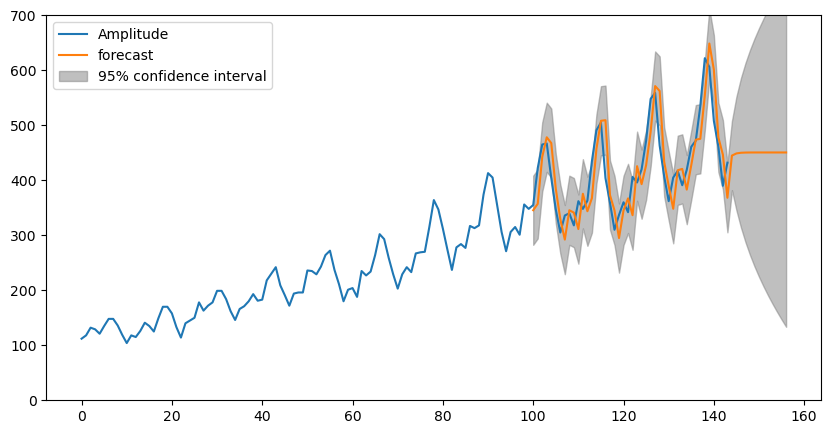

In [29]:
from statsmodels.graphics.tsaplots import plot_predict

# Plot the forecast along with the confidence band
forecast_steps = 12  # Number of steps to forecast ahead
fig, ax = plt.subplots(figsize=(10, 5))
plt.ylim([0,700])
ax = df.Amplitude.plot(ax=ax)
plot_predict(model_fit,start=100,end=model_fit.nobs + forecast_steps, ax=ax)
plt.show()

# ADDING MODEL COMPLEXITY

Alternatively, we can add complexity to the model using a higher differentiation and seasonality parameter

C:\Users\Nicolás Balmaceda\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nicolás Balmaceda\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nicolás Balmaceda\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Amplitude   No. Observations:                  144
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -698.926
Date:                Mon, 27 Nov 2023   AIC                           1401.852
Time:                        22:44:37   BIC                           1407.778
Sample:                             0   HQIC                          1404.260
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3066      0.080      3.849      0.000       0.150       0.463
sigma2      1029.2429    103.738      9.922      0.000     825.920    1232.566
Ljung-Box (L1) (Q):                   0.66   Jarque-

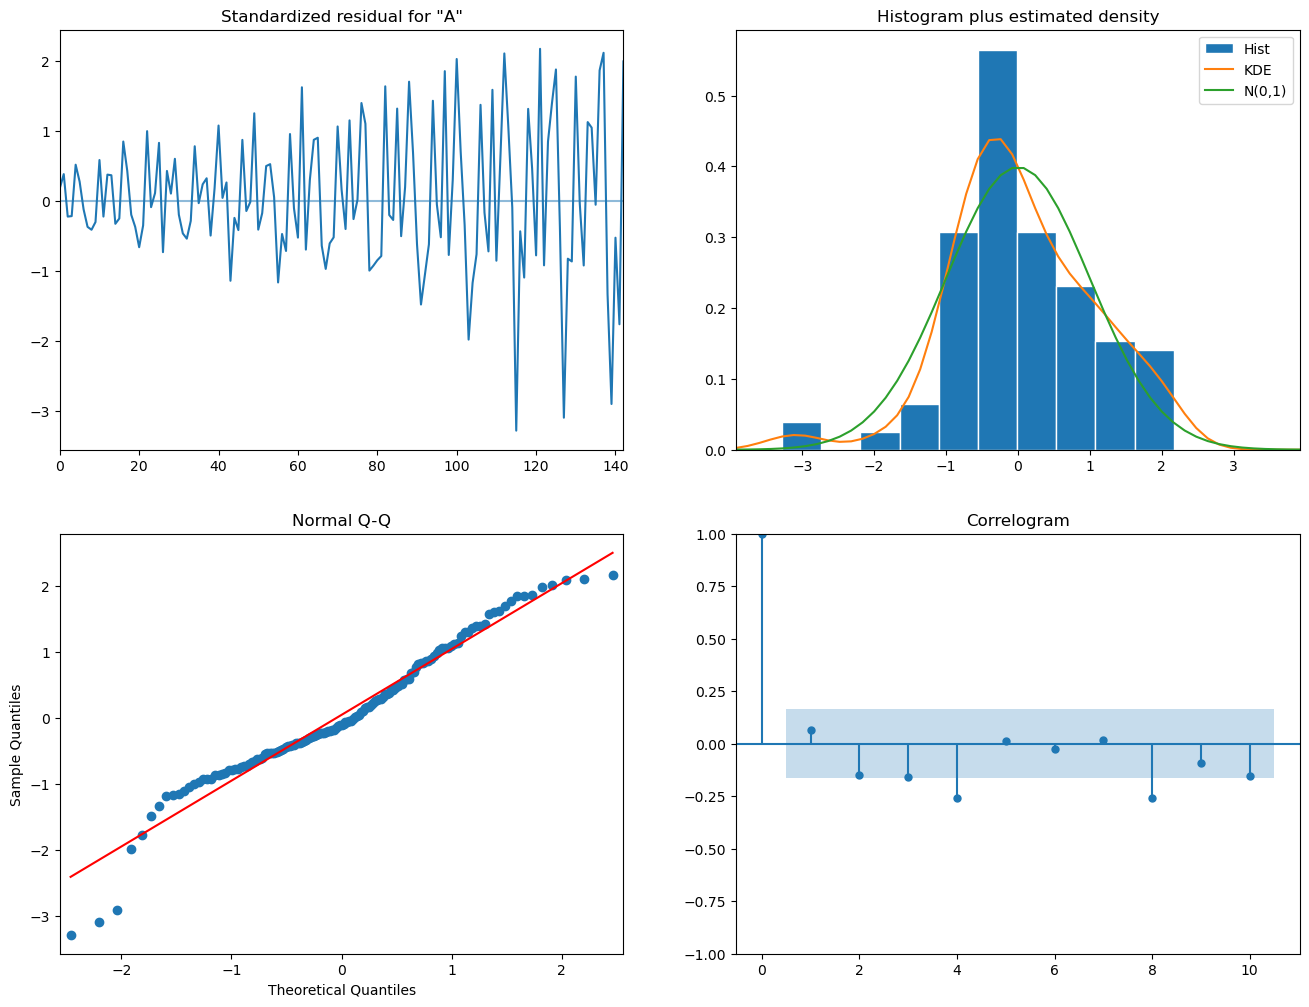

In [44]:
series = df['Amplitude']

# Changing the ARIMA model order
model_2 = ARIMA(series, order=(1,2,0))
model_2_fit = model.fit()

# summary of the model
print(model_2_fit.summary())

# model diagnostics visuals
model_2_fit.plot_diagnostics()
plt.show()

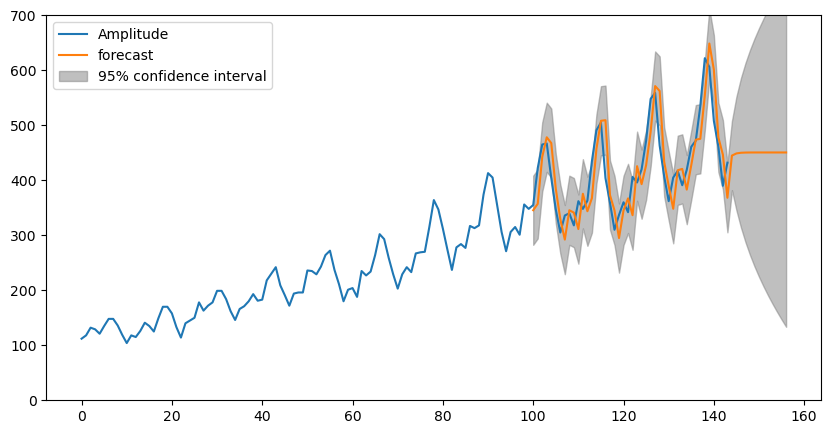

In [32]:
# Plot the forecast along with the confidence band
forecast_steps = 12  # Number of steps to forecast ahead
fig, ax = plt.subplots(figsize=(10, 5))
plt.ylim([0,700])
ax = df.Amplitude.plot(ax=ax)
plot_predict(model_2_fit,start=100,end=model_2_fit.nobs + forecast_steps, ax=ax)
plt.show()

# LOG-TRANSFOMED DATA

C:\Users\Nicolás Balmaceda\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nicolás Balmaceda\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nicolás Balmaceda\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        Differenced_Log   No. Observations:                  144
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 120.693
Date:                Mon, 27 Nov 2023   AIC                           -235.386
Time:                        22:45:08   BIC                           -226.476
Sample:                    01-01-1949   HQIC                          -231.766
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0097      0.012      0.794      0.427      -0.014       0.034
ar.L1          0.1997      0.096      2.083      0.037       0.012       0.388
sigma2         0.0108      0.002      5.955      0.0

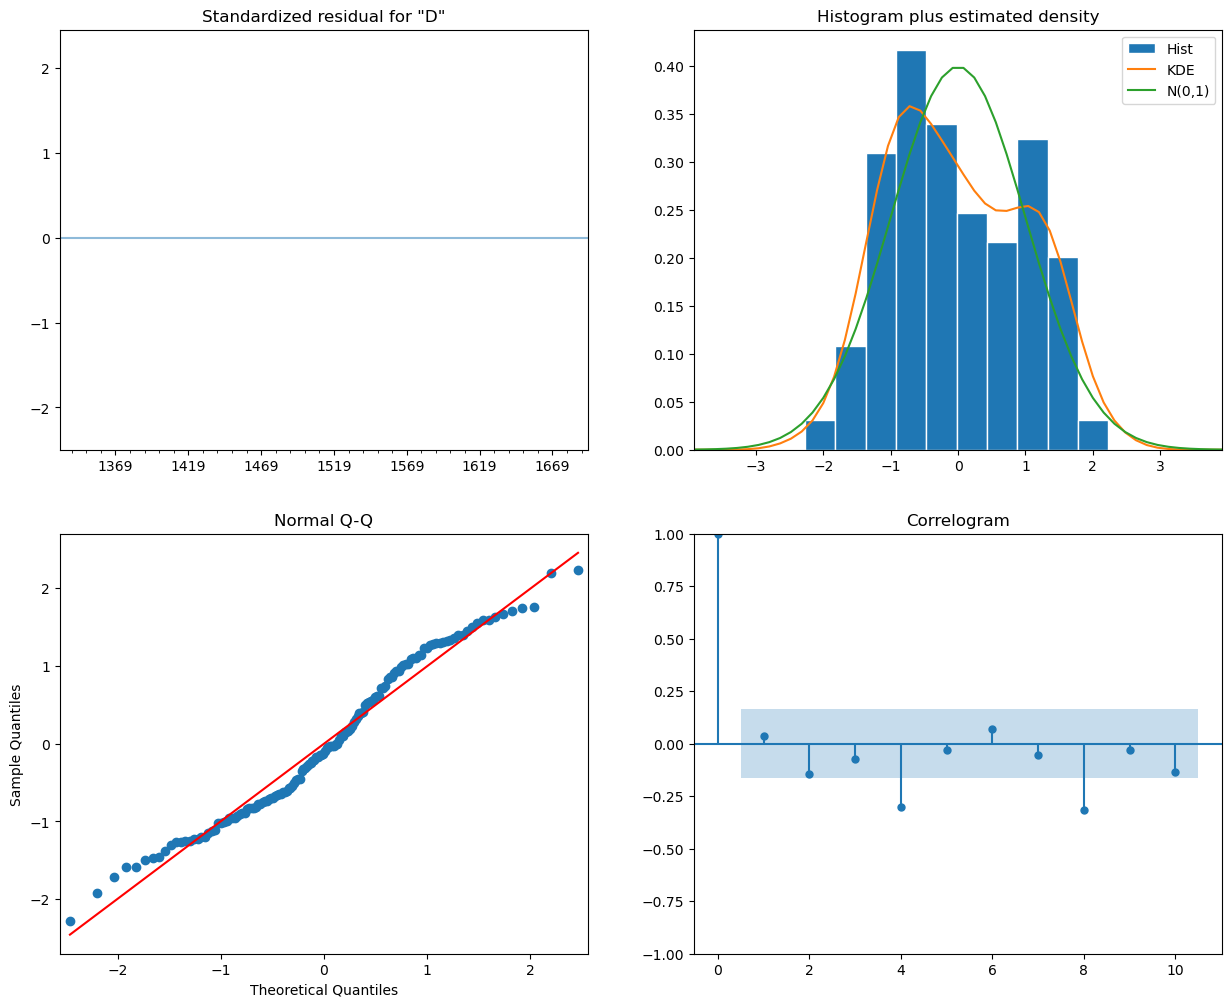

In [45]:
import numpy as np

# Check if the series has any non-positive values
if (df['Amplitude'] <= 0).any():
    print("The series contains non-positive values. Log transformation is not applicable.")
else:
    # Apply log transformation
    df['Log_Amplitude'] = np.log(df['Amplitude'])

    # Differencing the log-transformed series to make it stationary
    df['Differenced_Log'] = df['Log_Amplitude'].diff().dropna()

    # Fit ARIMA model to the differenced log-transformed series
    model_log = ARIMA(df['Differenced_Log'], order=(1, 0, 0))
    model_log_fit = model_log.fit()
    print(model_log_fit.summary())

    # Check for heteroskedasticity in the log-transformed series
    # Plot the diagnostics
    model_log_fit.plot_diagnostics(figsize=(15, 12))
    plt.show()

Comparing the diagnostics of the ARIMA model of the transformed data to the original data shows some improvement in the fit according to the AIC and BIC. The diagnostic plots indicate that the model's residuals are more consistent with the assumptions of normally distributed and independent errors. Given these improvements, the log-transformed model may offer better forecasts, but we would have to compare their predictive performance. 


# SARIMAX

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'Amplitude' is the time series column and df is your DataFrame
# The seasonal_order is chosen based on the seasonality of the data. Here's an example:
# The 's' value would be 12 for monthly data with yearly seasonality, or 4 for quarterly data, etc.

# Define the model with seasonal order
# The seasonal order below (P=1, D=1, Q=1, s=12) is just an example
sarima_model = SARIMAX(df['Amplitude'],
                       order=(1,1,0),              # Non-seasonal parameters
                       seasonal_order=(1,1,1,12))  # Seasonal parameters

# Fit the model
sarima_result = sarima_model.fit()

# Summary of the model
print(sarima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Amplitude   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -506.246
Date:                              Mon, 27 Nov 2023   AIC                           1020.493
Time:                                      16:35:05   BIC                           1031.994
Sample:                                           0   HQIC                          1025.166
                                              - 144                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3226      0.086     -3.739      0.000      -0.492      -0.153
ar.S.L12      -0.89

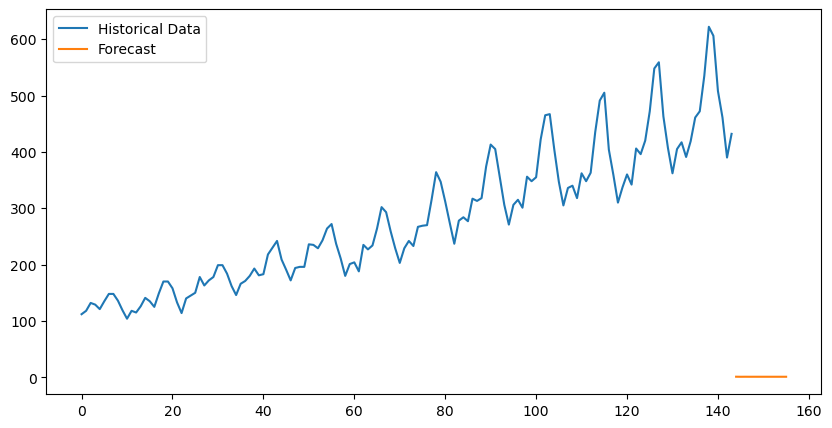

In [69]:
# Generate forecasts
forecast_steps = 12  # Number of steps to forecast into the future
forecast_res = model_log_fit.get_forecast(steps=forecast_steps)

# Get the forecast and the confidence intervals
forecast, conf_int = forecast_res.predicted_mean, forecast_res.conf_int()

# If the data was log-transformed, back-transform the forecasts and confidence intervals
#if log_transformed:
forecast = np.exp(forecast)
conf_int = np.exp(conf_int)

# Plot the historical data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Amplitude'], label='Historical Data')

# Plot the forecasted values
plt.plot(forecast.index, forecast, label='Forecast')

# Plot the confidence intervals
#plt.fill_between(forecast.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

plt.legend()
plt.show()


### Model Evaluation